In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

In [3]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression  
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, f1_score, confusion_matrix
%matplotlib inline
from sklearn.model_selection import ShuffleSplit
from sklearn import datasets
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from matplotlib import rcParams

In [5]:
df = pd.read_csv('dataset/Mental-Health-Twitter.csv')
df=df.drop('Unnamed: 0',axis=1)
df

,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label
0,637894677824413696,Sun Aug 30 07:48:37 +0000 2015,It's just over 2 years since I was diagnosed w...,1013187241,84,211,251,837,0,1
1,637890384576778240,Sun Aug 30 07:31:33 +0000 2015,"It's Sunday, I need a break, so I'm planning t...",1013187241,84,211,251,837,1,1
2,637749345908051968,Sat Aug 29 22:11:07 +0000 2015,Awake but tired. I need to sleep but my brain ...,1013187241,84,211,251,837,0,1
3,637696421077123073,Sat Aug 29 18:40:49 +0000 2015,RT @SewHQ: #Retro bears make perfect gifts and...,1013187241,84,211,251,837,2,1
4,637696327485366272,Sat Aug 29 18:40:26 +0000 2015,It’s hard to say whether packing lists are mak...,1013187241,84,211,251,837,1,1
...,...,...,...,...,...,...,...,...,...,...
19995,819336825231773698,Thu Jan 12 00:14:56 +0000 2017,A day without sunshine is like night.,1169875706,442,230,7,1063601,0,0
19996,819334654260080640,Thu Jan 12 00:06:18 +0000 2017,"Boren's Laws: (1) When in charge, ponder. (2) ...",1169875706,442,230,7,1063601,0,0
19997,819334503042871297,Thu Jan 12 00:05:42 +0000 2017,The flow chart is a most thoroughly oversold p...,1169875706,442,230,7,1063601,0,0
19998,819334419374899200,Thu Jan 12 00:05:22 +0000 2017,"Ships are safe in harbor, but they were never ...",1169875706,442,230,7,1063601,0,0


In [6]:
num=df['user_id'].value_counts()
num

490044008     2117
1458225506    1593
3249600438    1504
145626605     1276
1616997456     888
              ... 
805234081        2
351777130        1
2565061484       1
2848936114       1
3279878459       1
Name: user_id, Length: 72, dtype: int64

In [7]:
df = pd.read_csv('dataset/each_user.csv')
df=df.drop('Unnamed: 0',axis=1)
df

,user_id,followers,friends,favourites,statuses,label
0,1013187241,84,211,251,837,1
1,3346224328,189,169,698,3694,1
2,739069418,132,85,1807,2519,1
3,1383256561,17,54,155,108,1
4,2660477449,1206,2143,39008,950,1
...,...,...,...,...,...,...
68,29053403,465,189,80,31009,0
69,894149342,44,69,2228,5923,0
70,2780518314,11,13,573,1819,0
71,1458225506,1197,701,1156,61856,0


In [8]:
df['num']=0
df

,user_id,followers,friends,favourites,statuses,label,num
0,1013187241,84,211,251,837,1,0
1,3346224328,189,169,698,3694,1,0
2,739069418,132,85,1807,2519,1,0
3,1383256561,17,54,155,108,1,0
4,2660477449,1206,2143,39008,950,1,0
...,...,...,...,...,...,...,...
68,29053403,465,189,80,31009,0,0
69,894149342,44,69,2228,5923,0,0
70,2780518314,11,13,573,1819,0,0
71,1458225506,1197,701,1156,61856,0,0


In [9]:
df.set_index('user_id',inplace = True)
df

,followers,friends,favourites,statuses,label,num
user_id,,,,,,
1013187241,84,211,251,837,1,0
3346224328,189,169,698,3694,1,0
739069418,132,85,1807,2519,1,0
1383256561,17,54,155,108,1,0
2660477449,1206,2143,39008,950,1,0
...,...,...,...,...,...,...
29053403,465,189,80,31009,0,0
894149342,44,69,2228,5923,0,0
2780518314,11,13,573,1819,0,0


In [10]:
for user in num.index:
    df.loc[user,'num']= num[user]
df

,followers,friends,favourites,statuses,label,num
user_id,,,,,,
1013187241,84,211,251,837,1,243
3346224328,189,169,698,3694,1,650
739069418,132,85,1807,2519,1,29
1383256561,17,54,155,108,1,56
2660477449,1206,2143,39008,950,1,40
...,...,...,...,...,...,...
29053403,465,189,80,31009,0,112
894149342,44,69,2228,5923,0,131
2780518314,11,13,573,1819,0,193


In [11]:
df['num'].unique()

array([ 243,  650,   29,   56,   40,  188,  119,  177,  888,   71,    4,
        100,   78,   62,   50,  633,  161,  332,   25,    3,  725,  117,
         84,  109,    1,  458,  352,   35,    2,  138,  120,  306,  144,
         59,  530,    5,  196,  341,  221,  142,  125,  257,  698,  717,
         69,   60,   11, 1504,  543,  121, 1276,  396,  792,   95, 2117,
        522,  215,   17,  112,  131,  193, 1593,  360], dtype=int64)

In [12]:
order = ['followers', 'friends', 'favourites', 'statuses', 'num', 'label']
df = df[order]
df

,followers,friends,favourites,statuses,num,label
user_id,,,,,,
1013187241,84,211,251,837,243,1
3346224328,189,169,698,3694,650,1
739069418,132,85,1807,2519,29,1
1383256561,17,54,155,108,56,1
2660477449,1206,2143,39008,950,40,1
...,...,...,...,...,...,...
29053403,465,189,80,31009,112,0
894149342,44,69,2228,5923,131,0
2780518314,11,13,573,1819,193,0


c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


<AxesSubplot:>

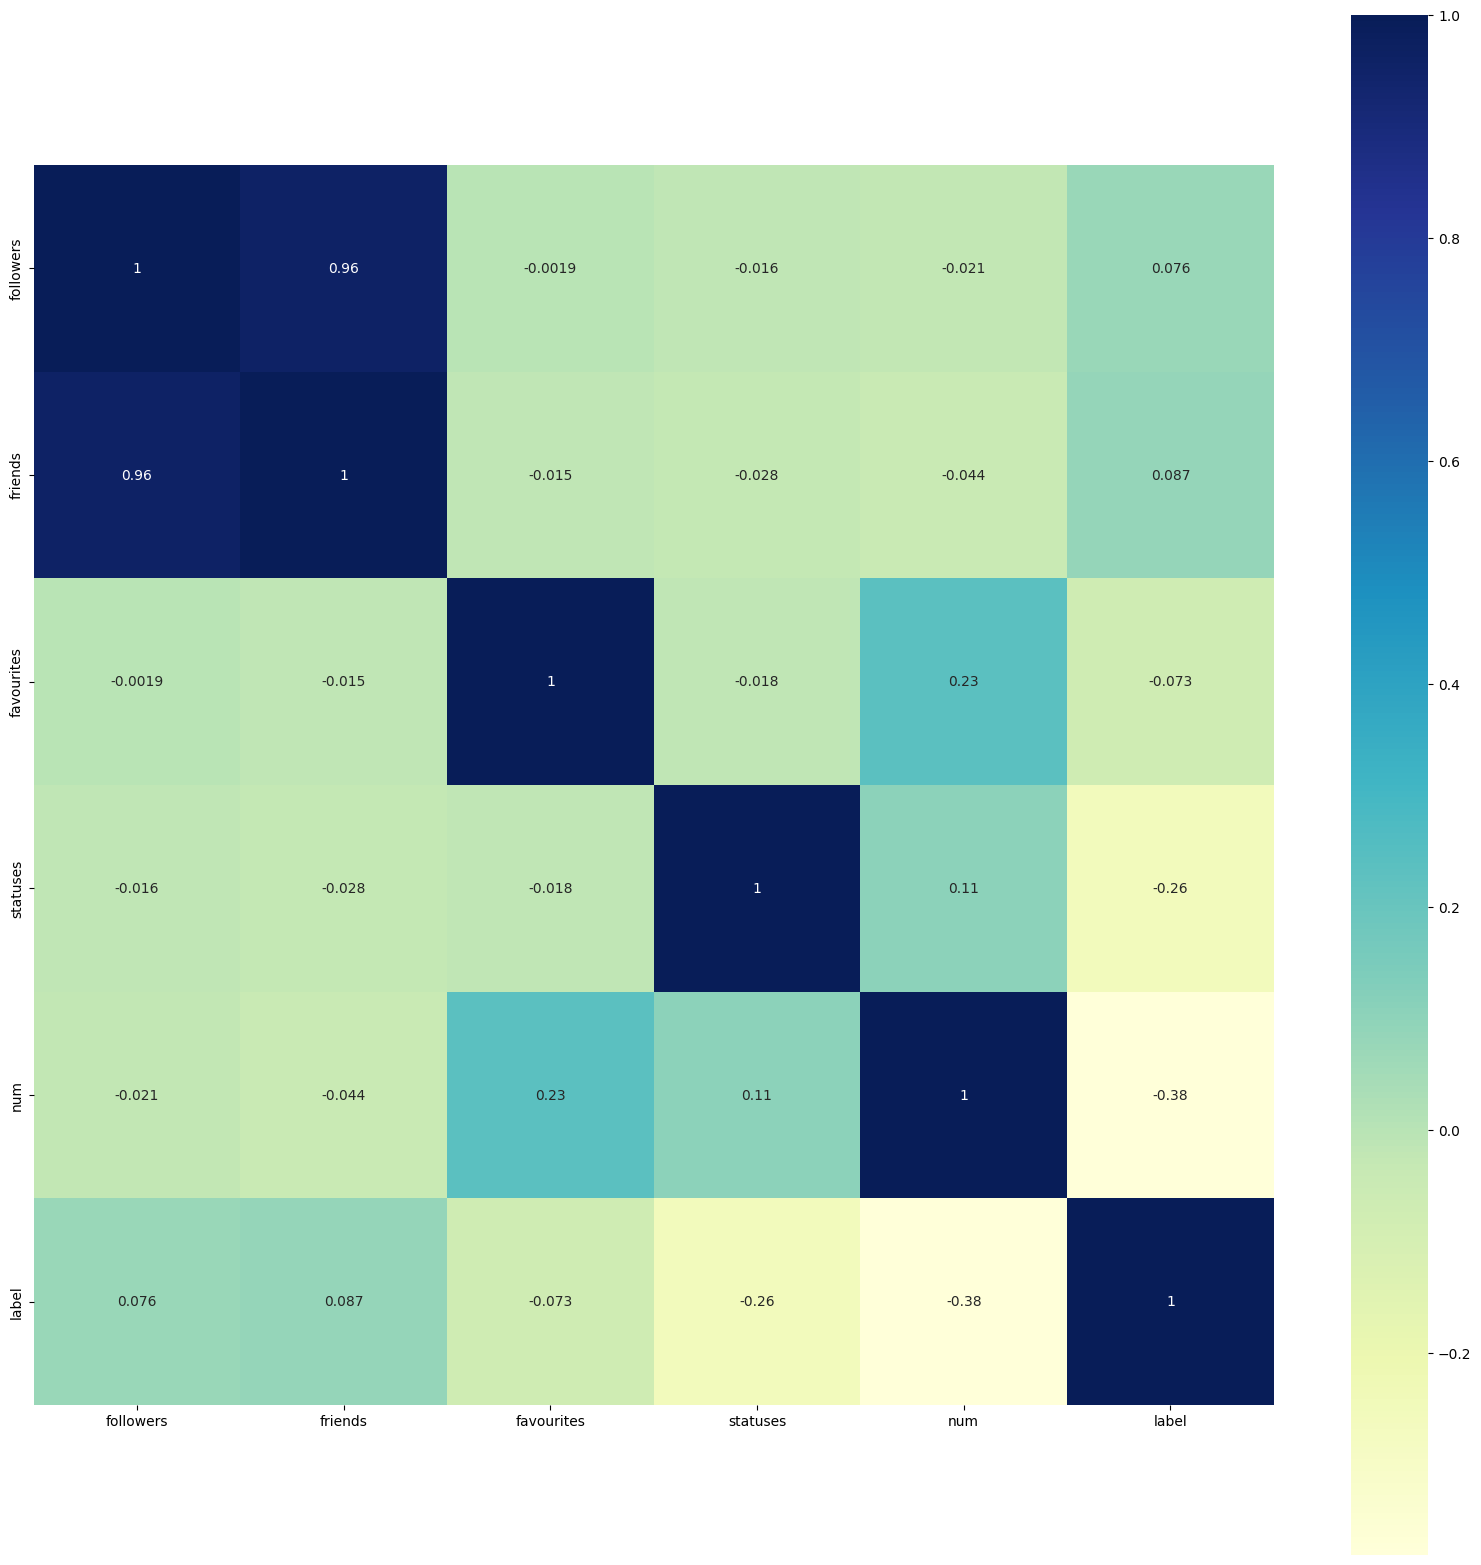

In [13]:
f, ax = plt.subplots(figsize=(20, 20))
corr = df.corr("pearson")
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap="YlGnBu",
            square=True, ax=ax,annot=True)

In [14]:
depressed=df[df['label']==1]
depressed

,followers,friends,favourites,statuses,num,label
user_id,,,,,,
1013187241,84,211,251,837,243,1
3346224328,189,169,698,3694,650,1
739069418,132,85,1807,2519,29,1
1383256561,17,54,155,108,56,1
2660477449,1206,2143,39008,950,40,1
221788137,155,355,130,5479,188,1
39248633,2454,1547,57,6155,119,1
1629737760,2377,738,3189,5624,177,1
1616997456,476,1235,0,21533,888,1


In [15]:
non_depressed=df[df['label']==0]
non_depressed

,followers,friends,favourites,statuses,num,label
user_id,,,,,,
727820220291645442,123,145,1068,23801,11,0
3249600438,235,185,24407,22302,1504,0
706699293558710273,39,120,15,14,2,0
18831261,884,2389,8466,57269,543,0
171999132,252,2119,704,1428,121,0
145626605,126,621,22,2111,1276,0
762433972273950725,20,0,0,2143,396,0
1497350173,640,445,24297,52892,792,0
2369443141,111,249,1195,780,95,0


## Visualization

### Depressed or not

In [16]:
df.groupby('label').count()['followers']

label
0    18
1    55
Name: followers, dtype: int64

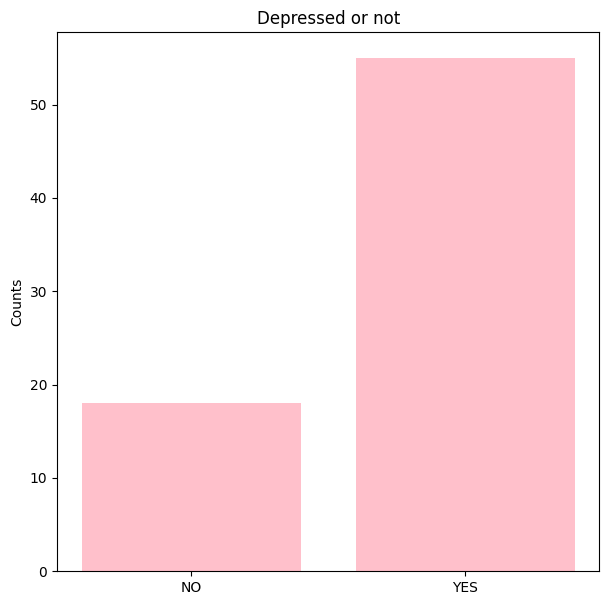

In [17]:
rcParams['figure.figsize'] = 7,7
X=['NO','YES']
Y=df.groupby('label').count()['followers']
fig = plt.figure()
plt.bar(X,Y,color="pink")

plt.ylabel("Counts")
plt.title("Depressed or not")

plt.show() 

### Followers Distribution

Text(0.5, 1.0, 'Followers Distribution')

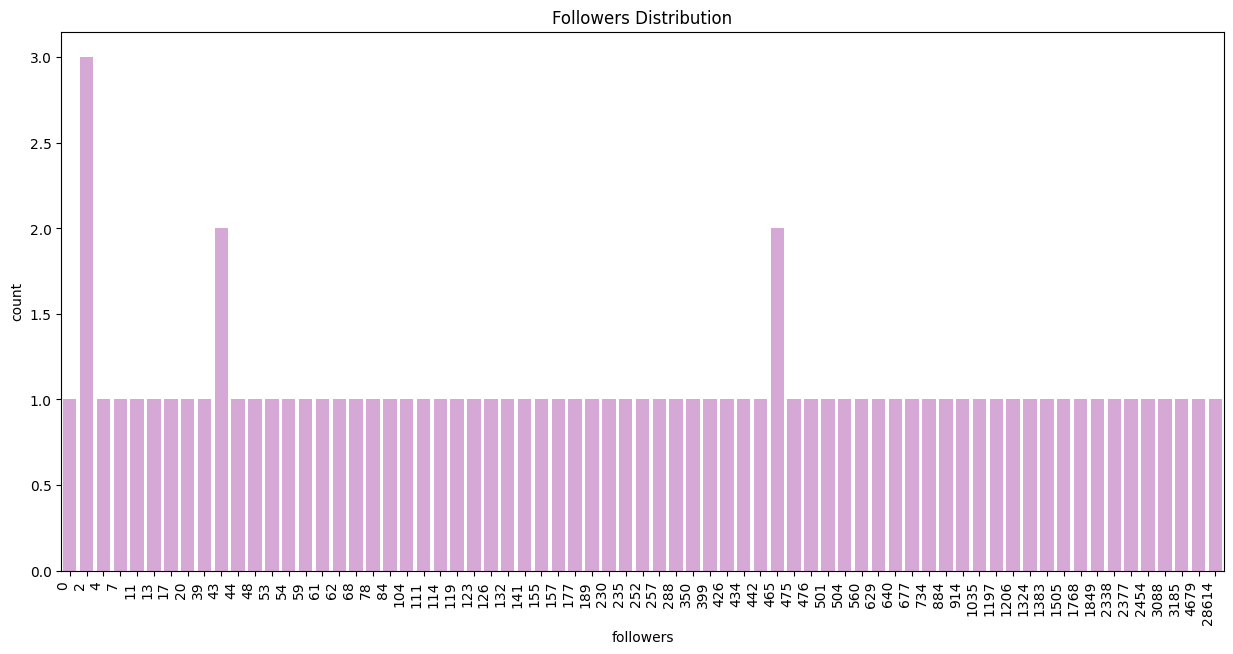

In [18]:
rcParams['figure.figsize'] = 15,7
ratings_plot = sns.countplot(x="followers",data=df, color="plum")
ratings_plot.set_xticklabels(ratings_plot.get_xticklabels(), rotation=90, ha="right")
ratings_plot 
plt.title('Followers Distribution')

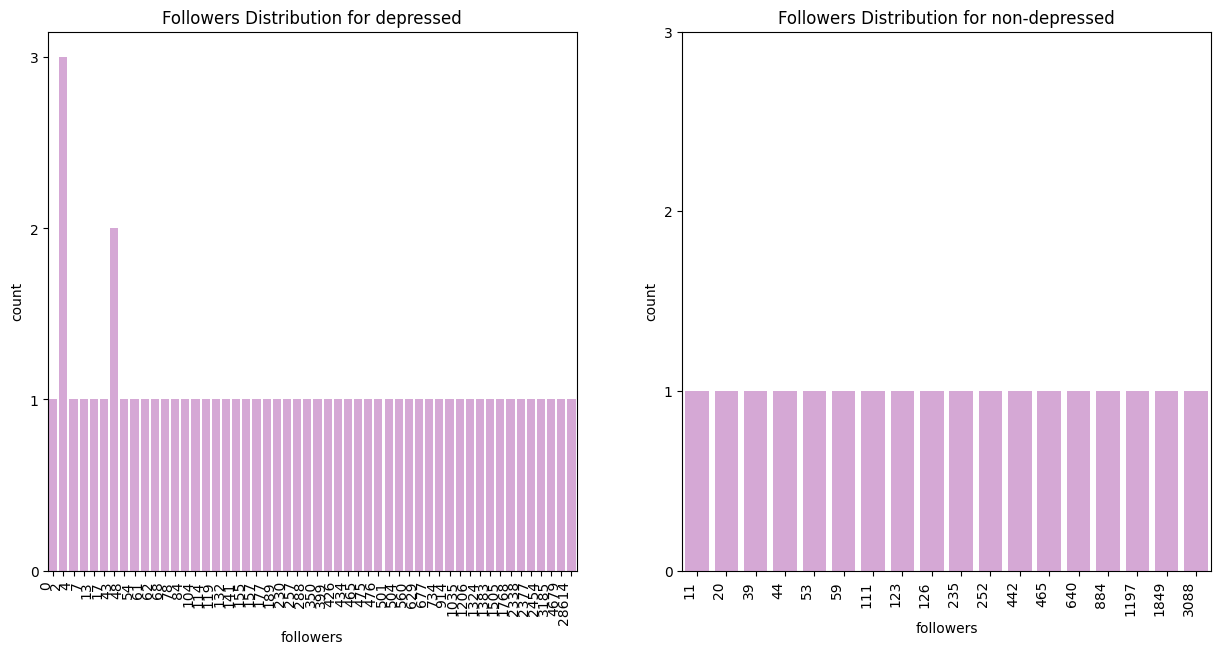

In [19]:
plt.subplot(1, 2, 1)
rcParams['figure.figsize'] = 15,7
ratings_plot = sns.countplot(x="followers",data=depressed, color="plum")
ratings_plot.set_xticklabels(ratings_plot.get_xticklabels(), rotation=90, ha="right")
ratings_plot.set_yticks([0,1,2,3])
ratings_plot 
plt.title('Followers Distribution for depressed')

plt.subplot(1, 2, 2)
rcParams['figure.figsize'] = 15,7
ratings_plot = sns.countplot(x="followers",data=non_depressed, color="plum")
ratings_plot.set_xticklabels(ratings_plot.get_xticklabels(), rotation=90, ha="right")
ratings_plot.set_yticks([0,1,2,3])
ratings_plot 
plt.title('Followers Distribution for non-depressed')

plt.show()

Text(0.5, 1.0, 'Scatter plot: followers vs. label')

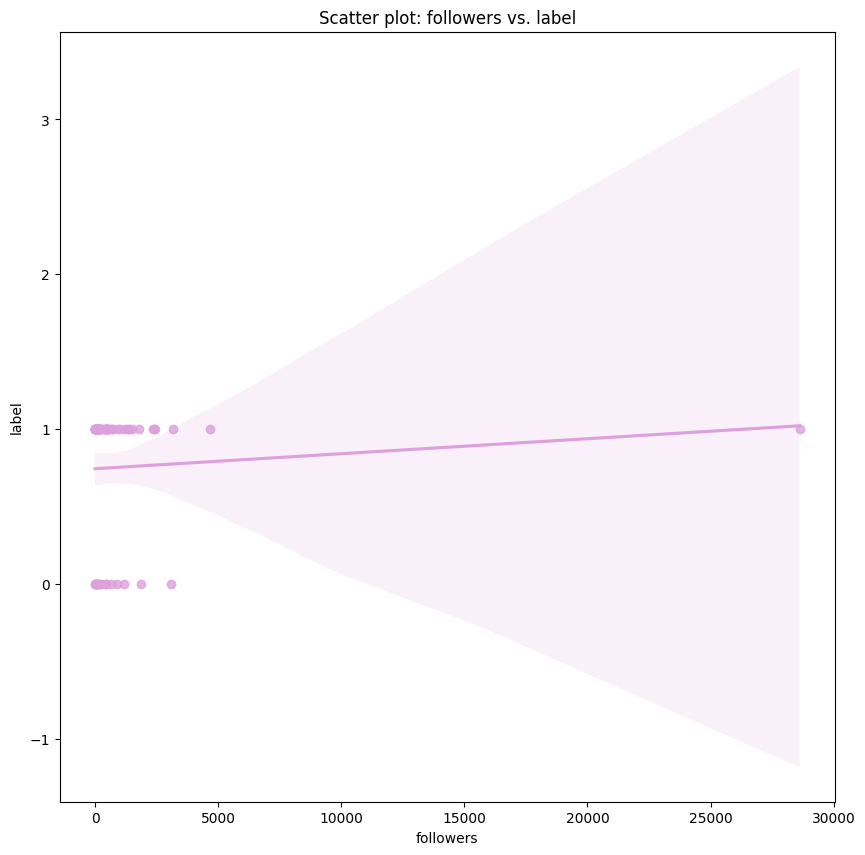

In [20]:
plt.figure(figsize = (10, 10))
sns.regplot(x="followers", y="label", data=df, color = "plum")
plt.xlabel("followers")
plt.ylabel("label")
plt.title("Scatter plot: followers vs. label")

### Friends Distribution

Text(0.5, 1.0, 'Friends Distribution')

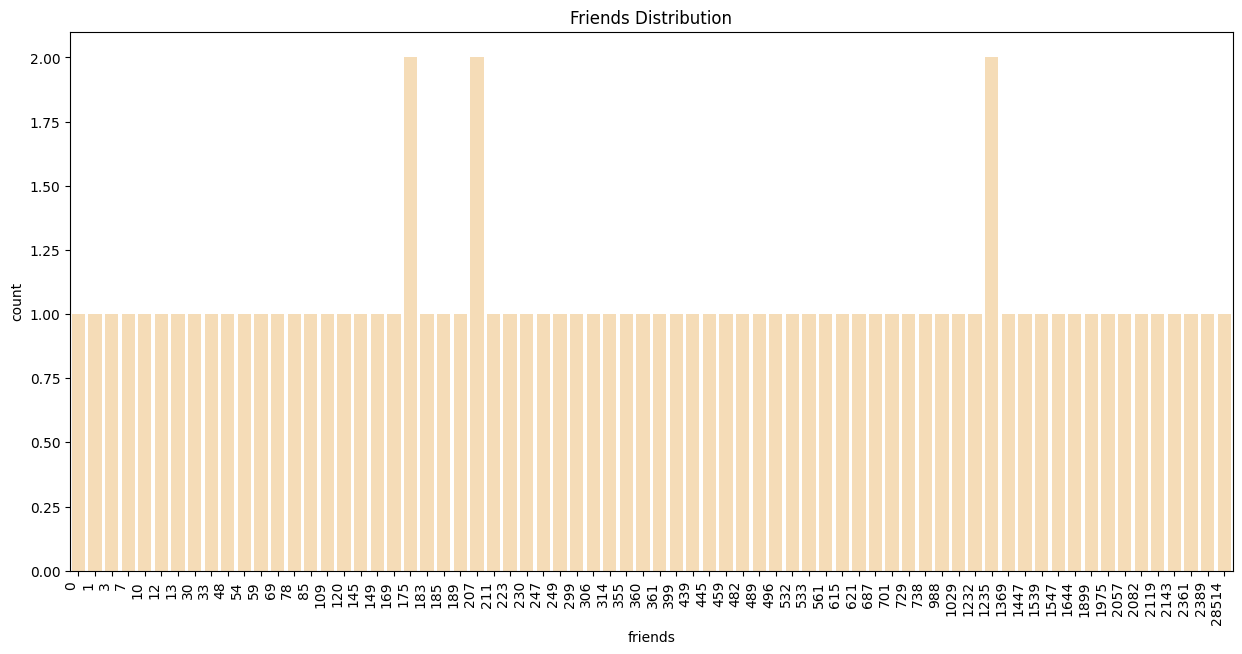

In [21]:
rcParams['figure.figsize'] = 15,7
ratings_plot = sns.countplot(x="friends",data=df, color="navajowhite")
ratings_plot.set_xticklabels(ratings_plot.get_xticklabels(), rotation=90, ha="right")
ratings_plot 
plt.title('Friends Distribution')

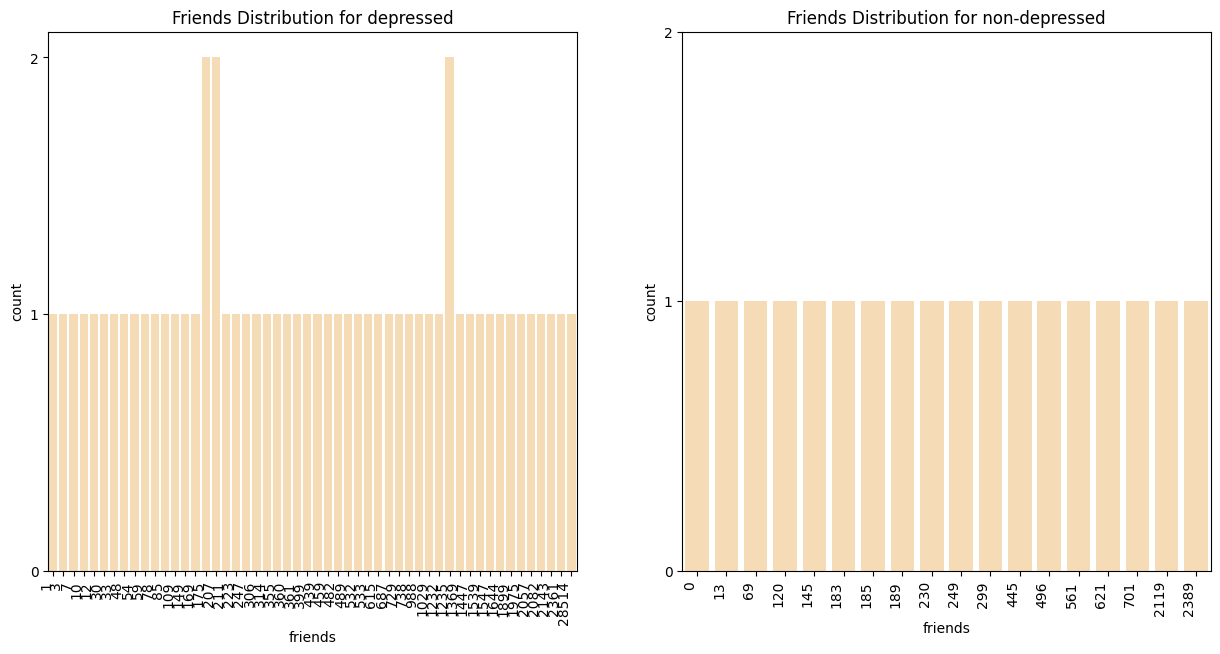

In [22]:
plt.subplot(1, 2, 1)
rcParams['figure.figsize'] = 15,7
ratings_plot = sns.countplot(x="friends",data=depressed, color="navajowhite")
ratings_plot.set_xticklabels(ratings_plot.get_xticklabels(), rotation=90, ha="right")
ratings_plot.set_yticks([0,1,2])
ratings_plot 
plt.title('Friends Distribution for depressed')

plt.subplot(1, 2, 2)
rcParams['figure.figsize'] = 15,7
ratings_plot = sns.countplot(x="friends",data=non_depressed, color="navajowhite")
ratings_plot.set_xticklabels(ratings_plot.get_xticklabels(), rotation=90, ha="right")
ratings_plot.set_yticks([0,1,2])
ratings_plot 
plt.title('Friends Distribution for non-depressed')

plt.show()

Text(0.5, 1.0, 'Scatter plot: friends vs. label')

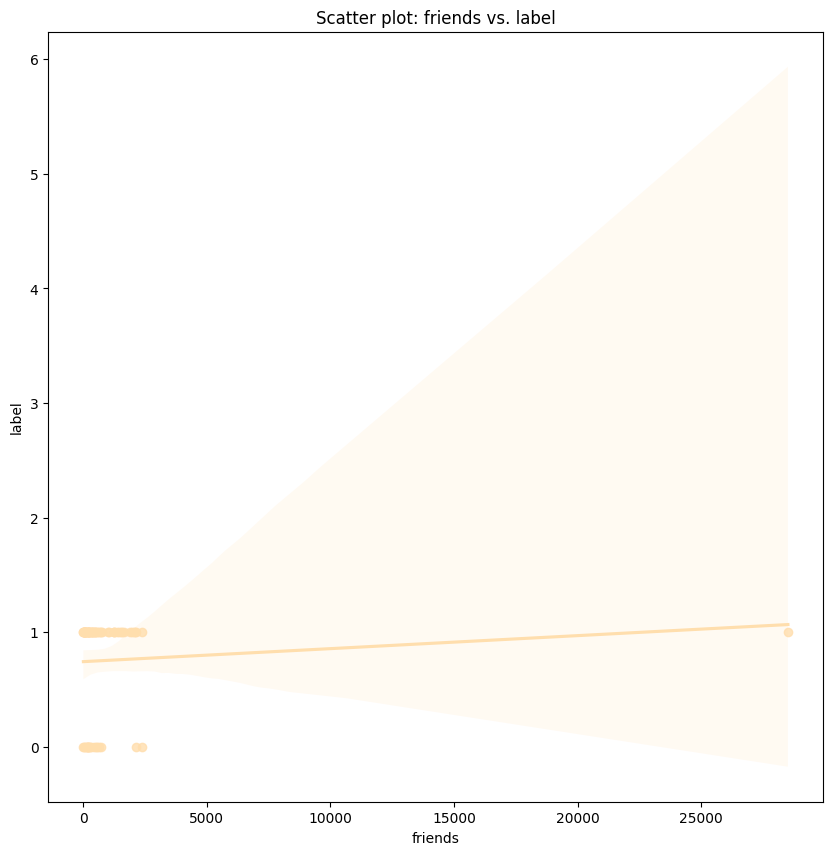

In [23]:
plt.figure(figsize = (10, 10))
sns.regplot(x="friends", y="label", data=df, color = "navajowhite")
plt.xlabel("friends")
plt.ylabel("label")
plt.title("Scatter plot: friends vs. label")

### Favourites	Distribution

Text(0.5, 1.0, 'Favourites Distribution')

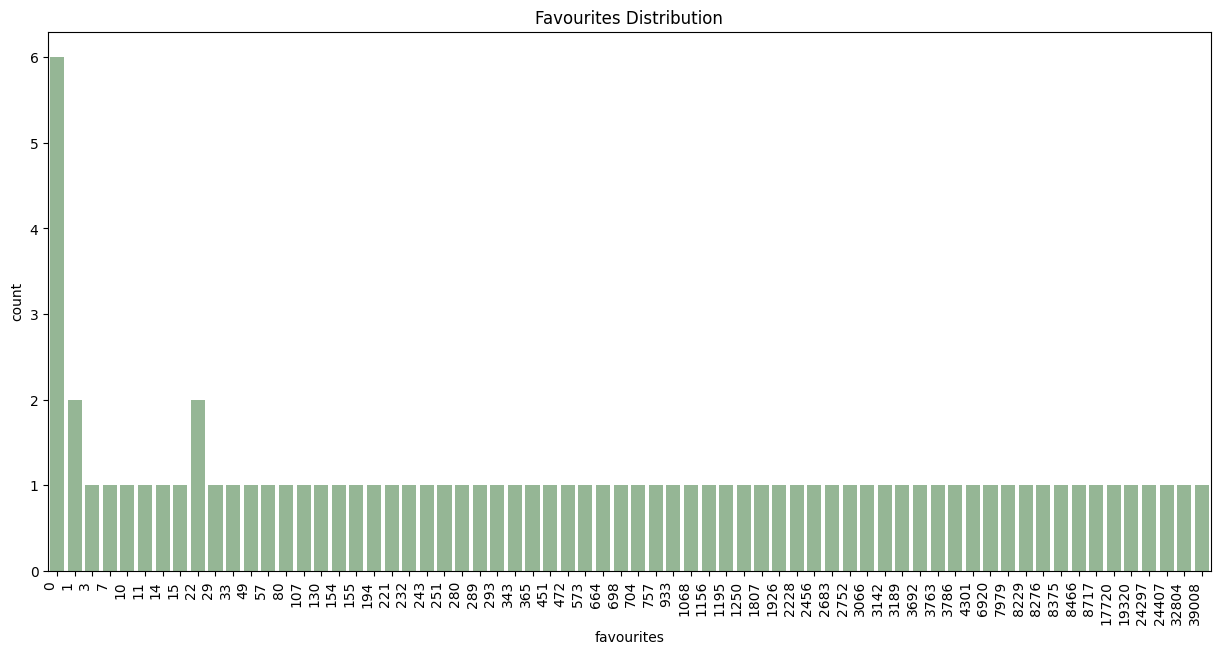

In [24]:
rcParams['figure.figsize'] = 15,7
ratings_plot = sns.countplot(x="favourites",data=df, color="darkseagreen")
ratings_plot.set_xticklabels(ratings_plot.get_xticklabels(), rotation=90, ha="right")
ratings_plot 
plt.title('Favourites Distribution')

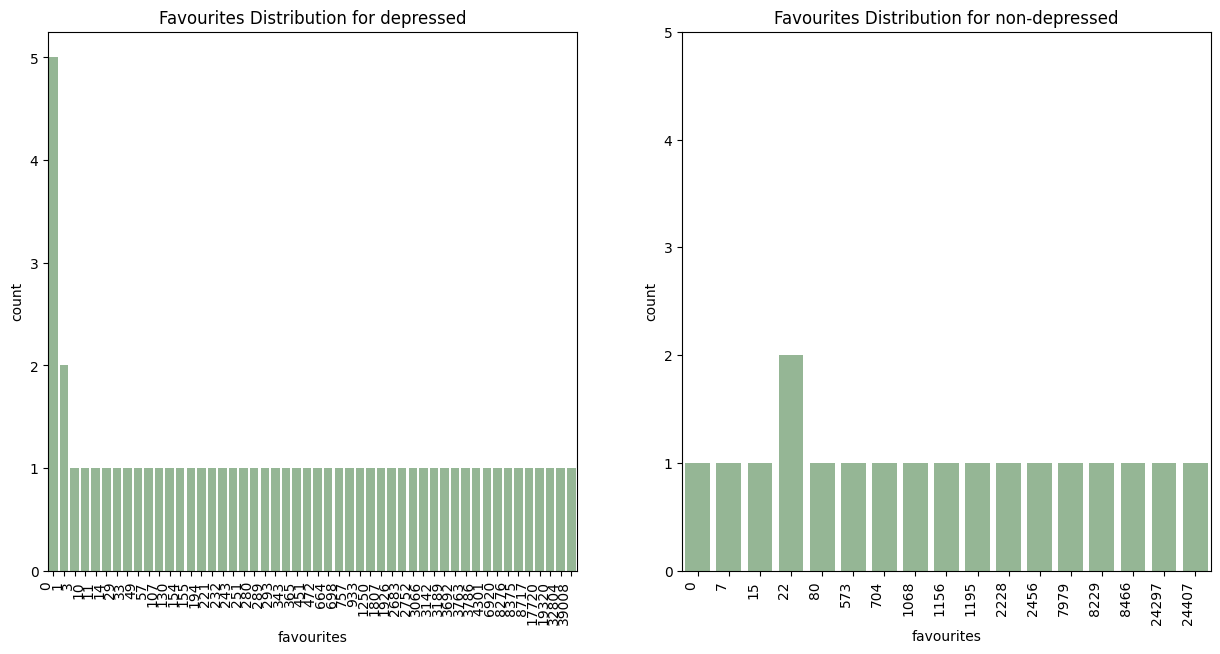

In [25]:
plt.subplot(1, 2, 1)
rcParams['figure.figsize'] = 15,7
ratings_plot = sns.countplot(x="favourites",data=depressed, color="darkseagreen")
ratings_plot.set_xticklabels(ratings_plot.get_xticklabels(), rotation=90, ha="right")
ratings_plot.set_yticks([0,1,2,3,4,5])
ratings_plot 
plt.title('Favourites Distribution for depressed')

plt.subplot(1, 2, 2)
rcParams['figure.figsize'] = 15,7
ratings_plot = sns.countplot(x="favourites",data=non_depressed, color="darkseagreen")
ratings_plot.set_xticklabels(ratings_plot.get_xticklabels(), rotation=90, ha="right")
ratings_plot.set_yticks([0,1,2,3,4,5])
ratings_plot 
plt.title('Favourites Distribution for non-depressed')

plt.show()

Text(0.5, 1.0, 'Scatter plot: favourites vs. label')

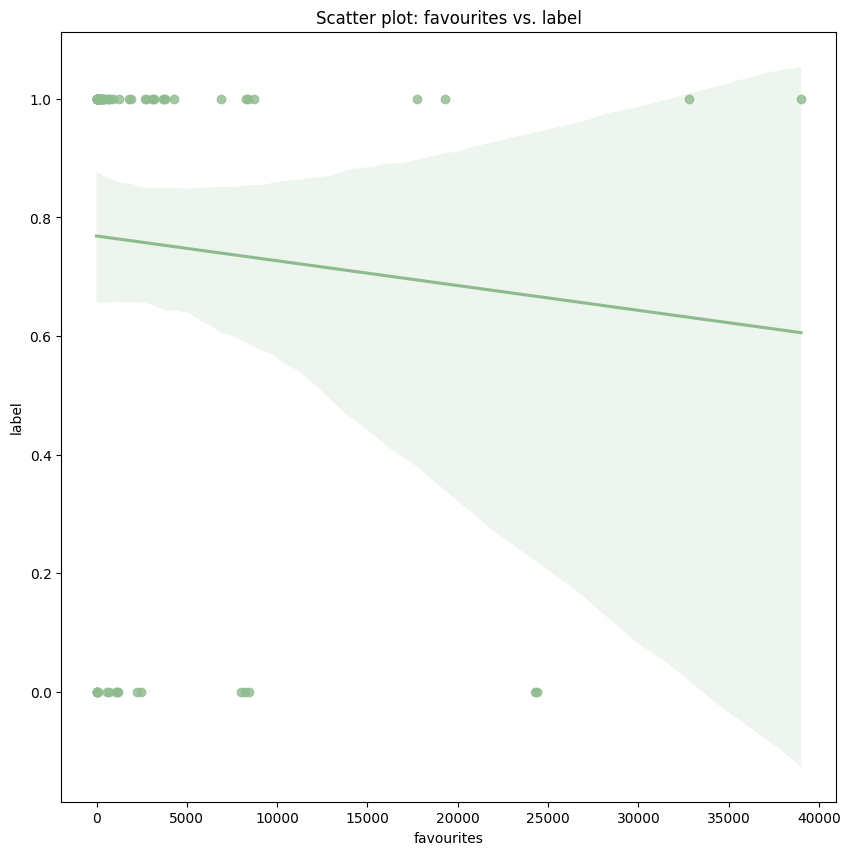

In [26]:
plt.figure(figsize = (10, 10))
sns.regplot(x="favourites", y="label", data=df, color = "darkseagreen")
plt.xlabel("favourites")
plt.ylabel("label")
plt.title("Scatter plot: favourites vs. label")

### Statuses Distribution

Text(0.5, 1.0, 'Statuses Distribution')

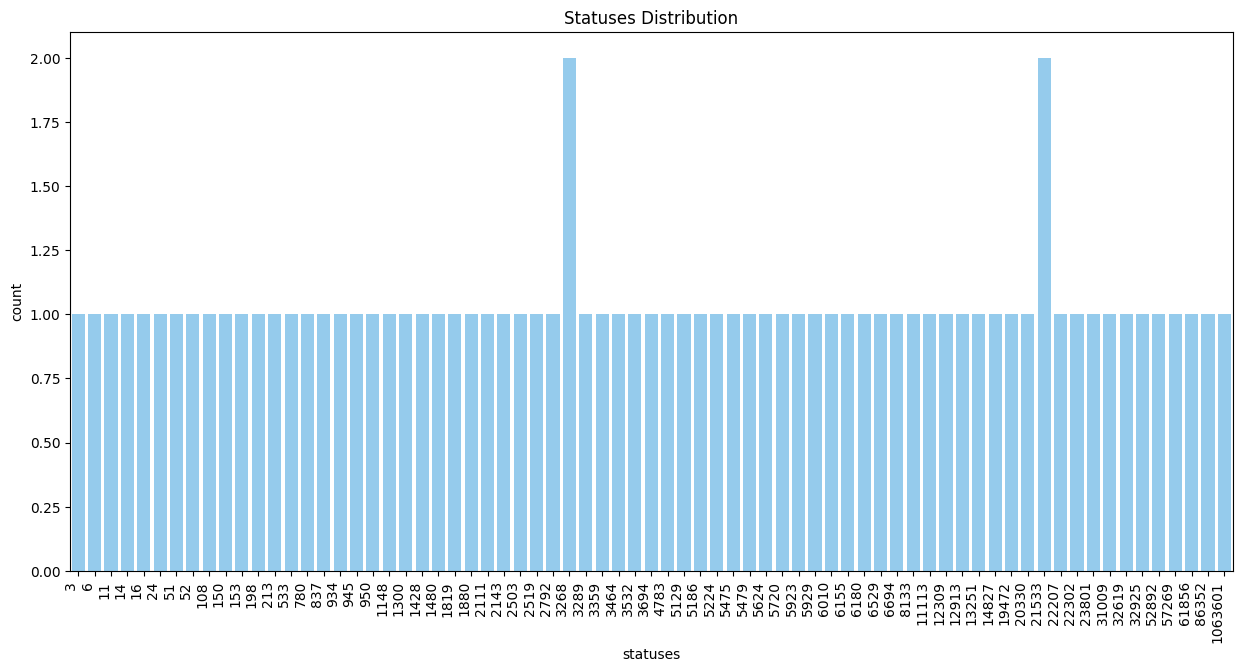

In [27]:
rcParams['figure.figsize'] = 15,7
ratings_plot = sns.countplot(x="statuses",data=df, color="lightskyblue")
ratings_plot.set_xticklabels(ratings_plot.get_xticklabels(), rotation=90, ha="right")
ratings_plot 
plt.title('Statuses Distribution')

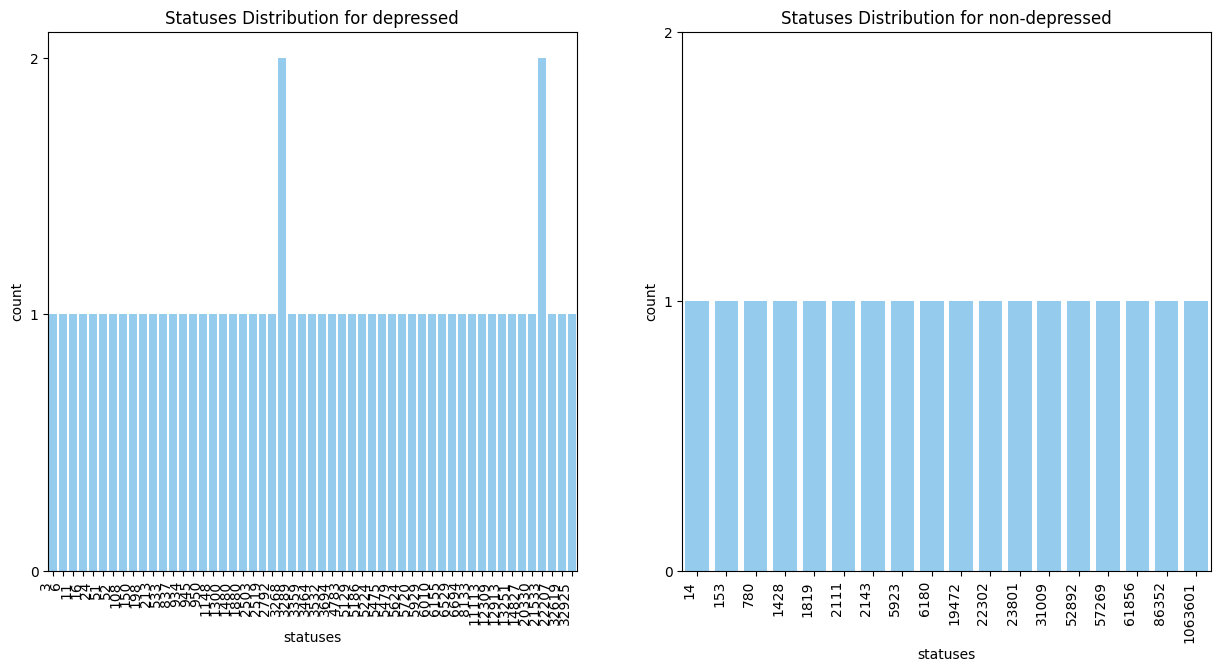

In [28]:
plt.subplot(1, 2, 1)
rcParams['figure.figsize'] = 15,7
ratings_plot = sns.countplot(x="statuses",data=depressed, color="lightskyblue")
ratings_plot.set_xticklabels(ratings_plot.get_xticklabels(), rotation=90, ha="right")
ratings_plot.set_yticks([0,1,2])
ratings_plot 
plt.title('Statuses Distribution for depressed')

plt.subplot(1, 2, 2)
rcParams['figure.figsize'] = 15,7
ratings_plot = sns.countplot(x="statuses",data=non_depressed, color="lightskyblue")
ratings_plot.set_xticklabels(ratings_plot.get_xticklabels(), rotation=90, ha="right")
ratings_plot.set_yticks([0,1,2])
ratings_plot 
plt.title('Statuses Distribution for non-depressed')

plt.show()

Text(0.5, 1.0, 'Scatter plot: statuses vs. label')

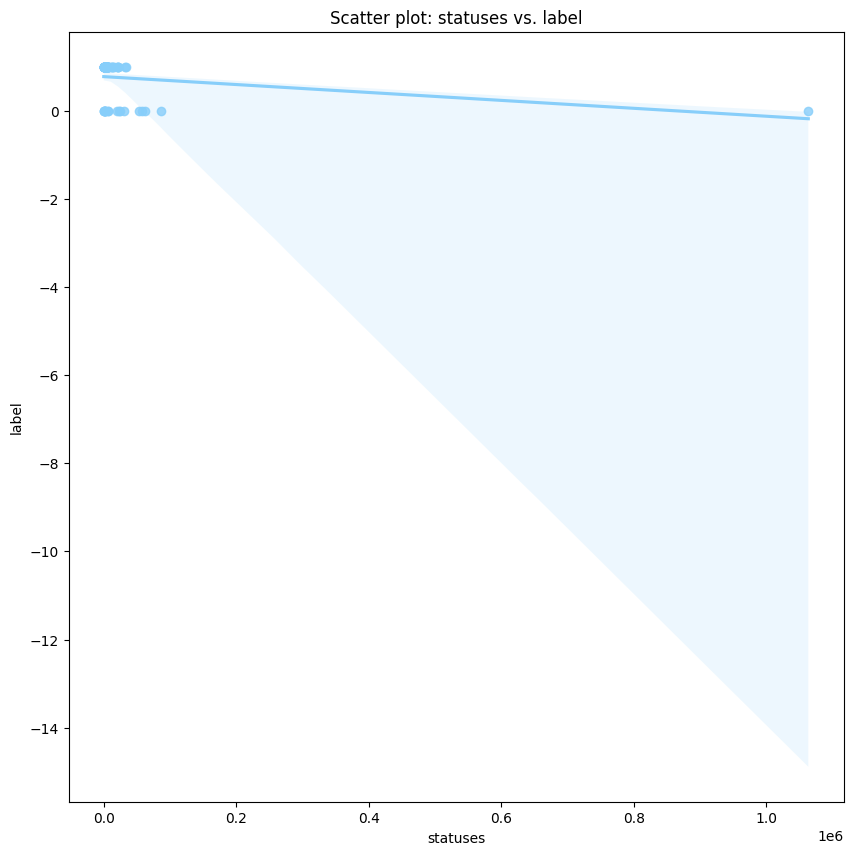

In [29]:
plt.figure(figsize = (10, 10))
sns.regplot(x="statuses", y="label", data=df, color = "lightskyblue")
plt.xlabel("statuses")
plt.ylabel("label")
plt.title("Scatter plot: statuses vs. label")

### num

Text(0.5, 1.0, 'Num Distribution')

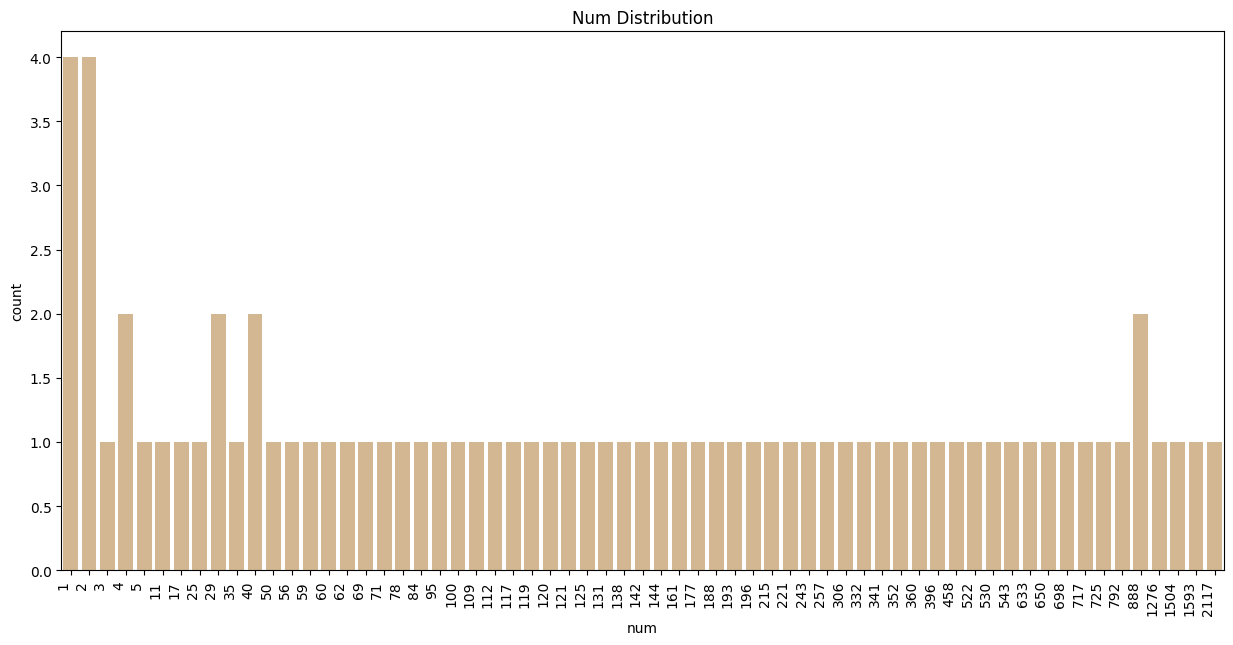

In [30]:
rcParams['figure.figsize'] = 15,7
ratings_plot = sns.countplot(x="num",data=df, color="burlywood")
ratings_plot.set_xticklabels(ratings_plot.get_xticklabels(), rotation=90, ha="right")
ratings_plot 
plt.title('Num Distribution')

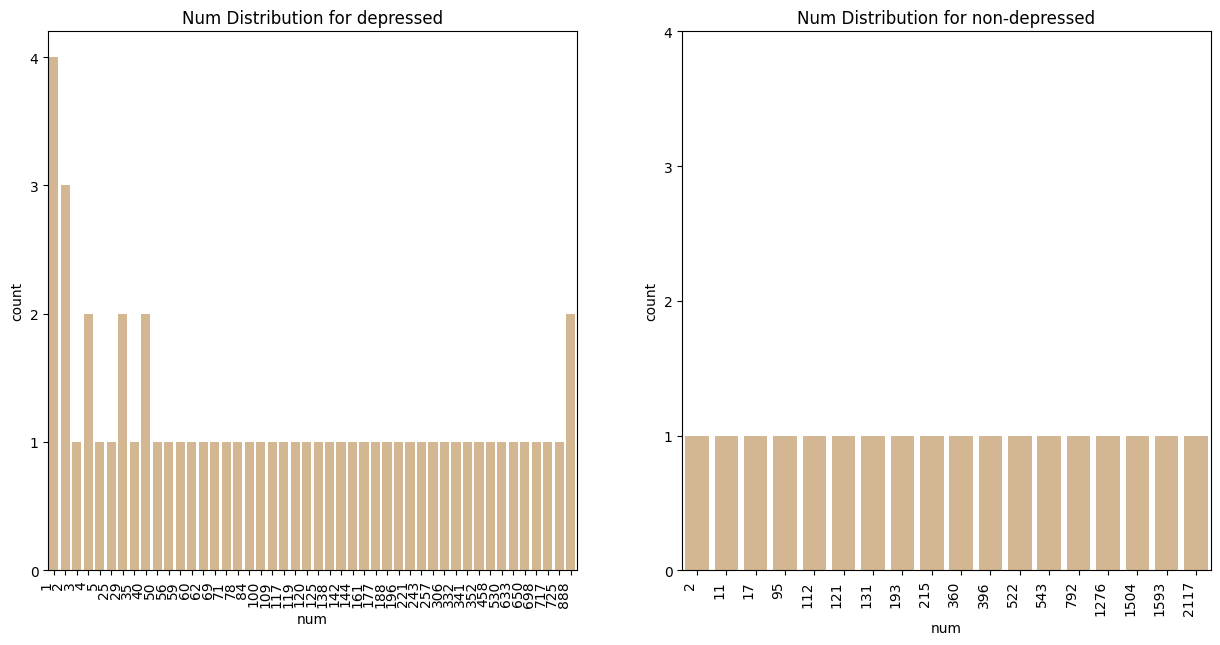

In [31]:
plt.subplot(1, 2, 1)
rcParams['figure.figsize'] = 15,7
ratings_plot = sns.countplot(x="num",data=depressed, color="burlywood")
ratings_plot.set_xticklabels(ratings_plot.get_xticklabels(), rotation=90, ha="right")
ratings_plot.set_yticks([0,1,2,3,4])
ratings_plot 
plt.title('Num Distribution for depressed')

plt.subplot(1, 2, 2)
rcParams['figure.figsize'] = 15,7
ratings_plot = sns.countplot(x="num",data=non_depressed, color="burlywood")
ratings_plot.set_xticklabels(ratings_plot.get_xticklabels(), rotation=90, ha="right")
ratings_plot.set_yticks([0,1,2,3,4])
ratings_plot 
plt.title('Num Distribution for non-depressed')

plt.show()

Text(0.5, 1.0, 'Scatter plot: Num vs. label')

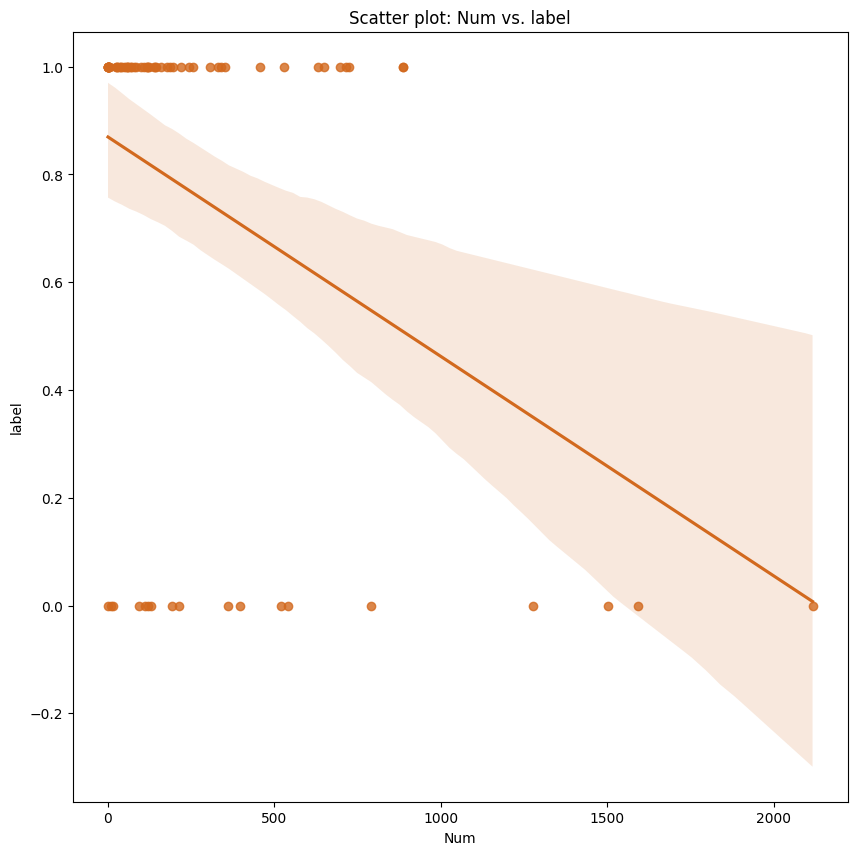

In [32]:
plt.figure(figsize = (10, 10))
sns.regplot(x="num", y="label", data=df, color = "chocolate")
plt.xlabel("Num")
plt.ylabel("label")
plt.title("Scatter plot: Num vs. label")

## Modeling

In [33]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
 
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    plt.draw()
    plt.show()

    midpoint = ((train_scores_mean[-1] + train_scores_std[-1]) + (test_scores_mean[-1] - test_scores_std[-1])) / 2
    diff = (train_scores_mean[-1] + train_scores_std[-1]) - (test_scores_mean[-1] - test_scores_std[-1])
    return midpoint, diff

In [34]:
df_X = df.drop('label',axis=1)
df_y = df.label
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=0, shuffle=True)

In [35]:
df_y.value_counts()

1    55
0    18
Name: label, dtype: int64

### Logistics Regression

In [36]:
log_reg_model = LogisticRegression().fit(X_train, y_train)
log_reg_pred = log_reg_model.predict(X_test)
print("Accuracy of train:",log_reg_model.score(X_train,y_train))
print("Accuracy of test:",accuracy_score(log_reg_pred,y_test))
print('coef:',log_reg_model.coef_)
print('intercept:',log_reg_model.intercept_)

Accuracy of train: 0.8448275862068966
Accuracy of test: 0.8
coef: [[ 3.40140346e-04  9.23999557e-04  7.90075156e-06 -7.29301953e-05
  -6.67025156e-04]]
intercept: [1.40932718]


In [37]:
print(classification_report(y_test, log_reg_pred))

              precision    recall  f1-score   support

           0       0.50      0.33      0.40         3
           1       0.85      0.92      0.88        12

    accuracy                           0.80        15
   macro avg       0.67      0.62      0.64        15
weighted avg       0.78      0.80      0.78        15



In [38]:
print(confusion_matrix(y_test, log_reg_pred))

[[ 1  2]
 [ 1 11]]


In [39]:
from sklearn.metrics import roc_curve, auc

<Figure size 1500x700 with 0 Axes>

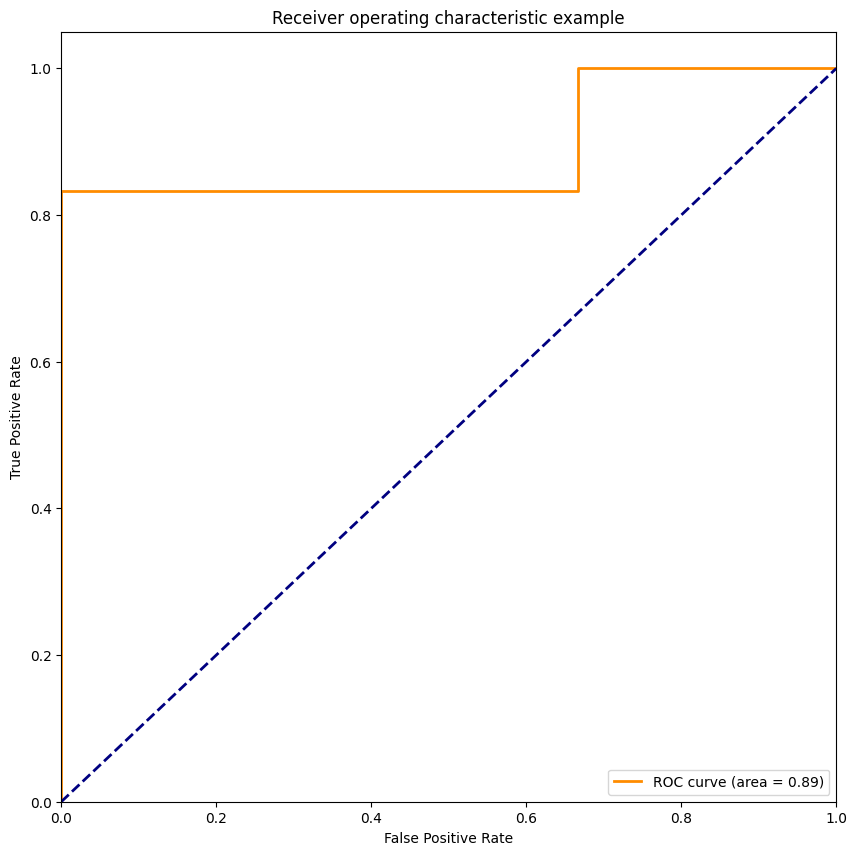

In [40]:
y_score = log_reg_model.predict_proba(X_test)
fpr,tpr,threshold = roc_curve(y_test, y_score[:,1])
roc_auc = auc(fpr,tpr)
 
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

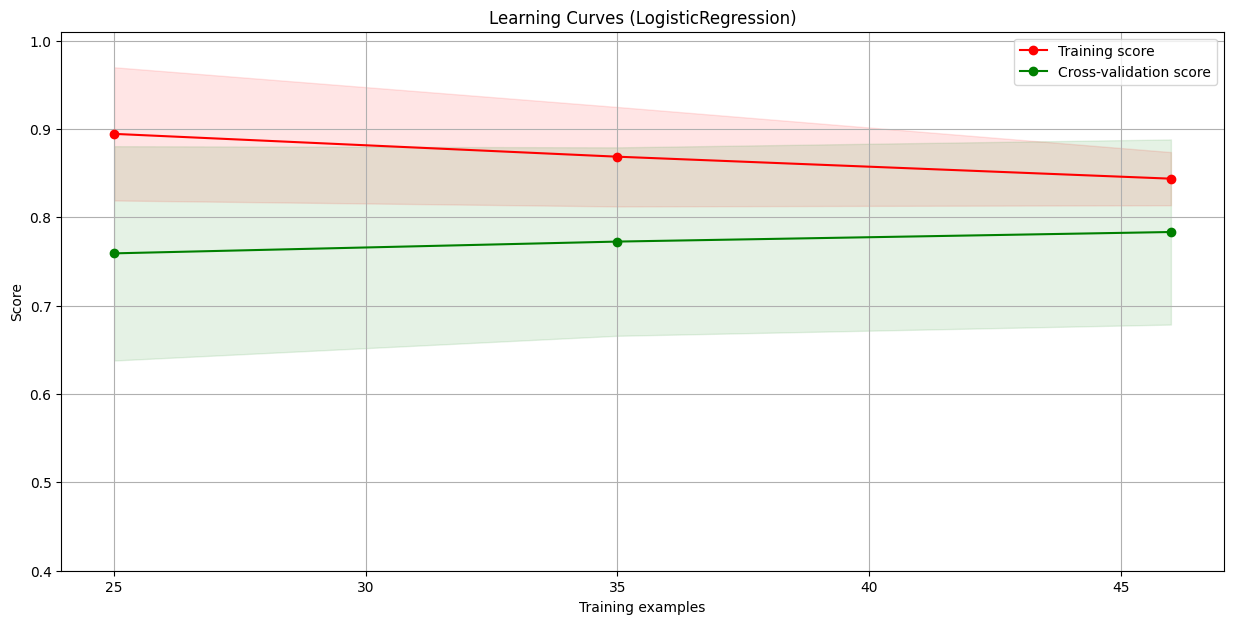

(0.7761776716946278, 0.19518542822219775)

In [41]:
title = "Learning Curves (LogisticRegression)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = LogisticRegression()
plot_learning_curve(estimator, title, X_train, y_train, ylim=(0.4, 1.01), cv=cv, n_jobs=4)

### Naive Bayes

In [42]:
from sklearn.naive_bayes import GaussianNB

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [43]:
nb_model = GaussianNB().fit(X_train,y_train)
nb_pred = nb_model.predict(X_test)
print("Accuracy of train:",nb_model.score(X_train,y_train))
print("Accuracy of test:",accuracy_score(nb_pred,y_test))

Accuracy of train: 0.7931034482758621
Accuracy of test: 0.8666666666666667


In [44]:
#predictions
nb_model_preds = nb_model.predict(X_test)
print(classification_report(y_test,nb_model_preds))

              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.86      1.00      0.92        12

    accuracy                           0.87        15
   macro avg       0.93      0.67      0.71        15
weighted avg       0.89      0.87      0.84        15



In [45]:
print(confusion_matrix(y_test, nb_pred))

[[ 1  2]
 [ 0 12]]


<Figure size 1500x700 with 0 Axes>

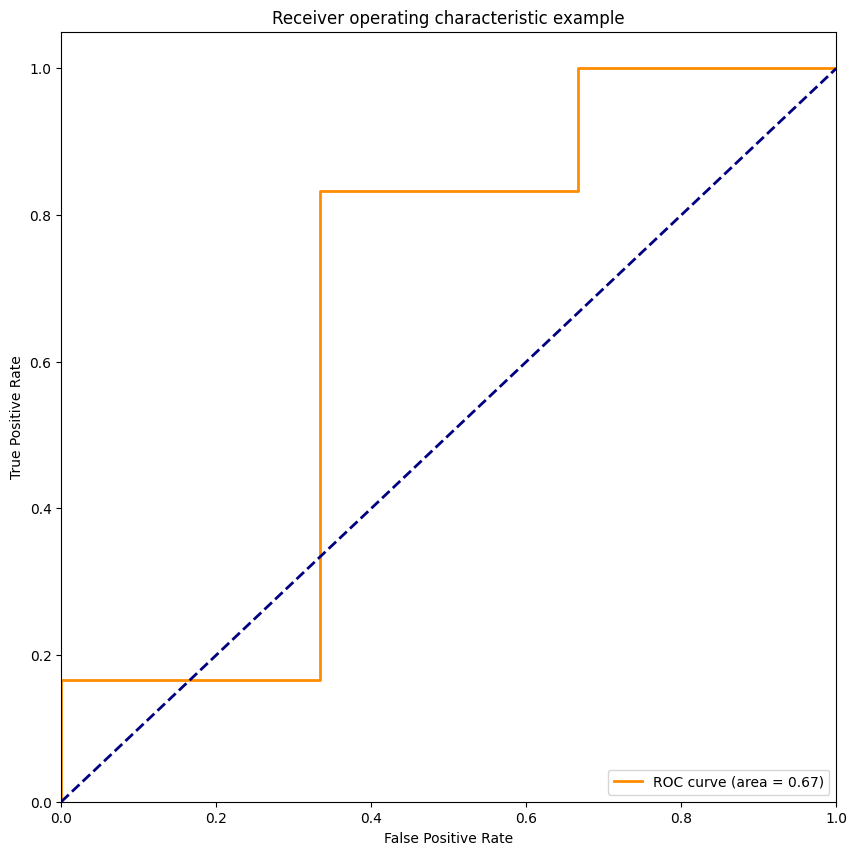

In [46]:
y_score = nb_model.predict_proba(X_test)
fpr,tpr,threshold = roc_curve(y_test, y_score[:,1])
roc_auc = auc(fpr,tpr)
 
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

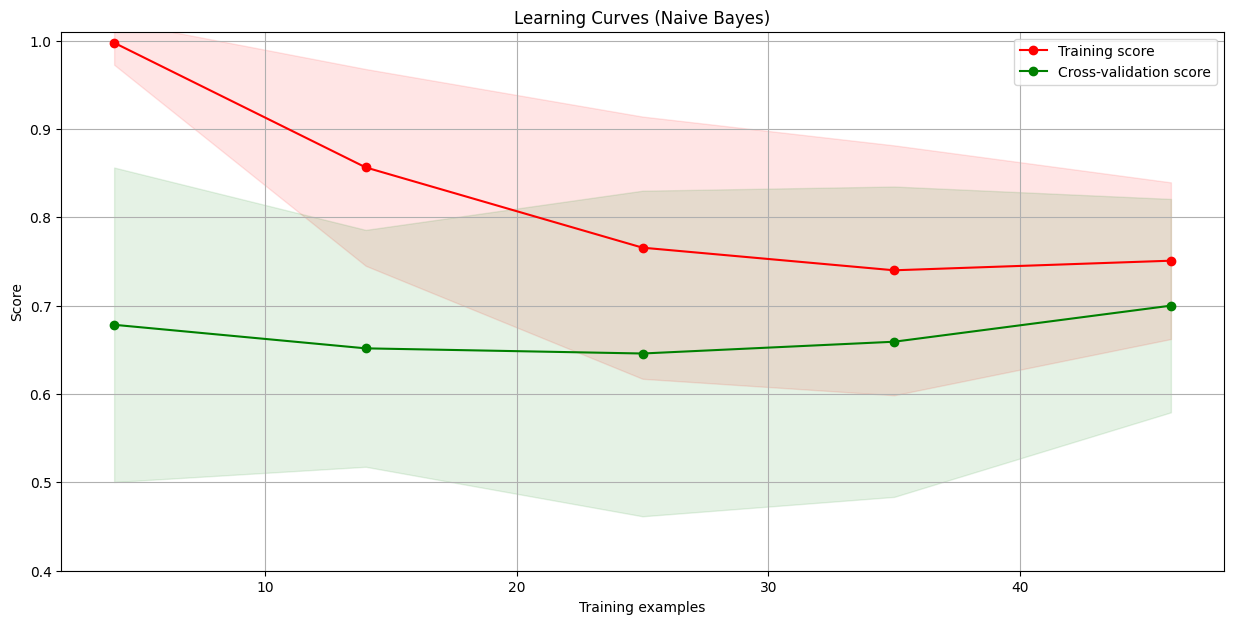

(0.7093778887859254, 0.26027872334167423)

In [47]:
title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = GaussianNB()
plot_learning_curve(estimator, title, X_train, y_train, ylim=(0.4, 1.01), cv=cv, n_jobs=4)

### SVM

In [48]:
from sklearn.svm import SVC

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model_SVC = SVC(C=0.8, kernel='rbf', gamma=20, decision_function_shape='ovr',probability=True)
SVC_mol=model_SVC.fit(X_train, y_train)

In [49]:
pred_SVC = model_SVC.predict(X_test)
print("Accuracy of train:",model_SVC.score(X_train,y_train))
print("Accuracy of test:",accuracy_score(pred_SVC,y_test))

Accuracy of train: 0.8793103448275862
Accuracy of test: 0.8


In [50]:
pred_SVC = SVC_mol.predict(X_test)
print(classification_report(y_test,pred_SVC))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.80      1.00      0.89        12

    accuracy                           0.80        15
   macro avg       0.40      0.50      0.44        15
weighted avg       0.64      0.80      0.71        15



c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [51]:
print(confusion_matrix(y_test, pred_SVC))

[[ 0  3]
 [ 0 12]]


<Figure size 1500x700 with 0 Axes>

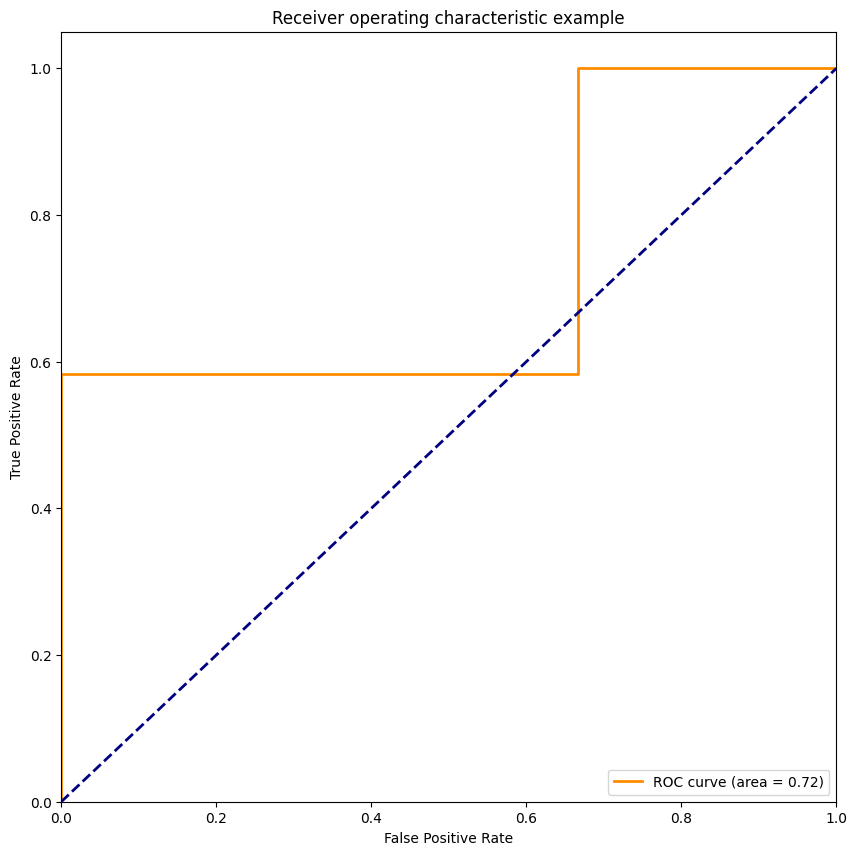

In [95]:
y_score = model_SVC.predict_proba(X_test)
fpr,tpr,threshold = roc_curve(y_test, y_score[:,1])
roc_auc = auc(fpr,tpr)
 
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

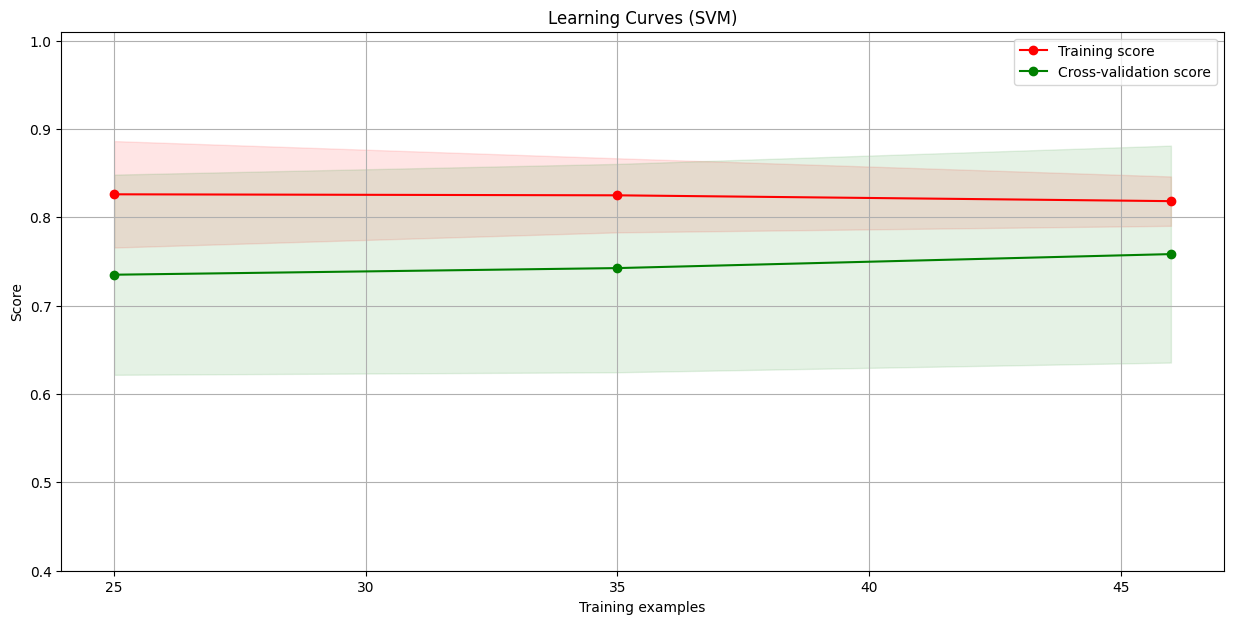

(0.7408821702992958, 0.2106130049761955)

In [53]:
title = "Learning Curves (SVM)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = SVC()
plot_learning_curve(estimator, title, X_train, y_train, ylim=(0.4, 1.01), cv=cv, n_jobs=4)

### Decision Tree

In [54]:
from sklearn import tree
dt1 = tree.DecisionTreeClassifier(max_depth=3)
dt1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

[Text(0.625, 0.875, 'X[3] <= 0.1\ngini = 0.383\nsamples = 58\nvalue = [15, 43]'),
 Text(0.5, 0.625, 'X[1] <= -0.233\ngini = 0.306\nsamples = 53\nvalue = [10, 43]'),
 Text(0.25, 0.375, 'X[3] <= -0.167\ngini = 0.444\nsamples = 24\nvalue = [8, 16]'),
 Text(0.125, 0.125, 'gini = 0.32\nsamples = 20\nvalue = [4, 16]'),
 Text(0.375, 0.125, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.75, 0.375, 'X[0] <= -0.288\ngini = 0.128\nsamples = 29\nvalue = [2, 27]'),
 Text(0.625, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.875, 0.125, 'gini = 0.069\nsamples = 28\nvalue = [1, 27]'),
 Text(0.75, 0.625, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]')]

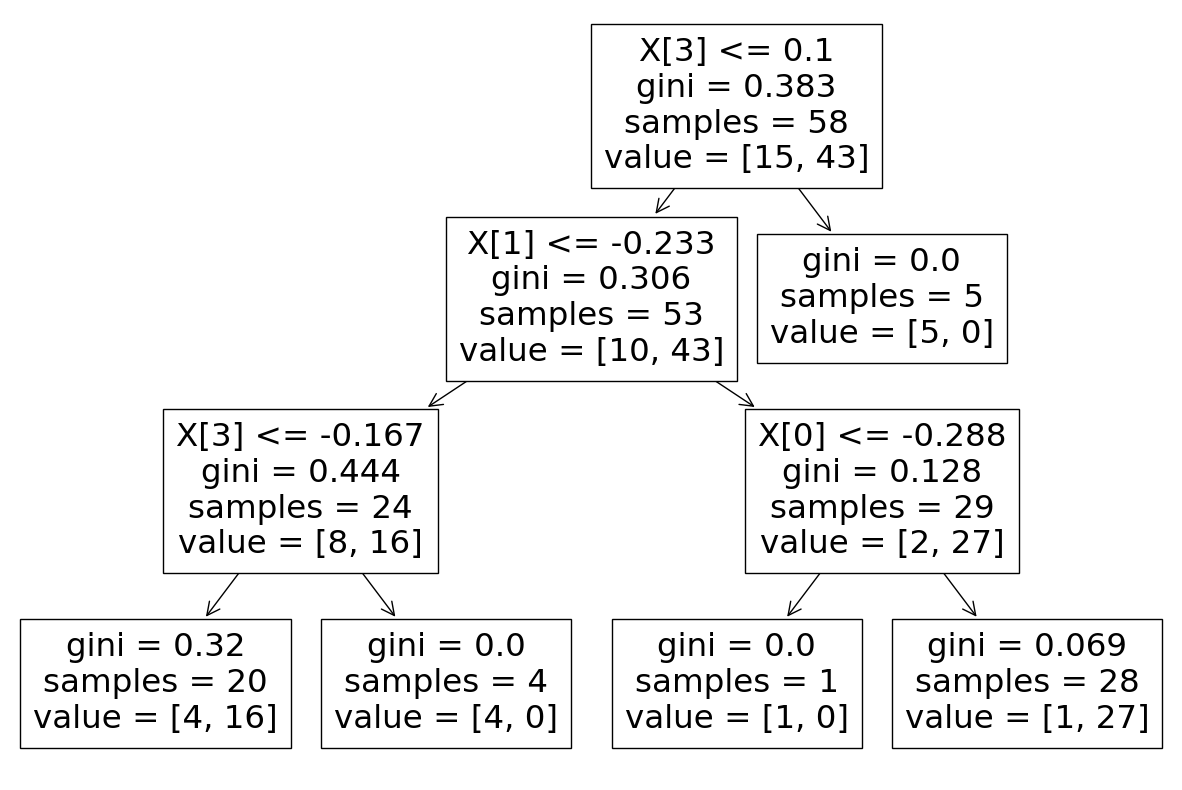

In [55]:
plt.figure(figsize=(15, 10))
tree.plot_tree(dt1)

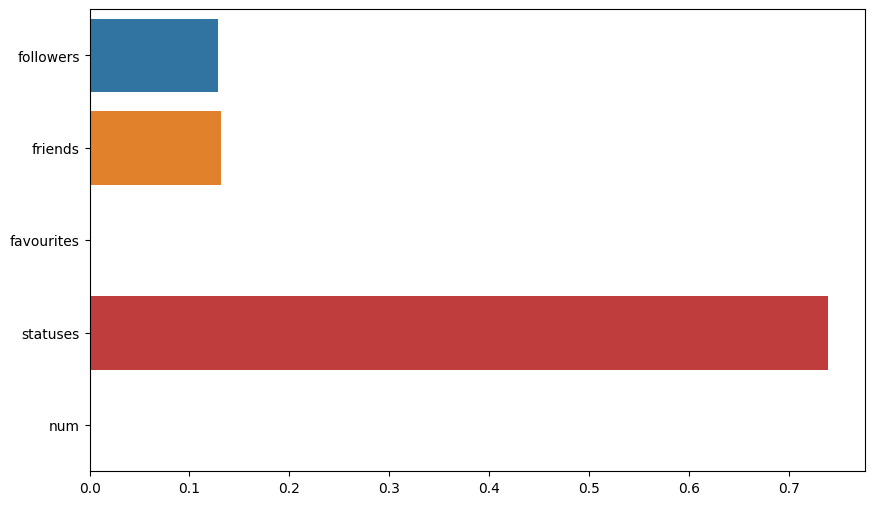

In [56]:
plt.figure(figsize=(10, 6))
sns.barplot(x=dt1.feature_importances_, y=df_X.columns)
plt.show()

In [57]:
#predictions
dt_preds = dt1.predict(X_test)
print("Accuracy of train:",dt1.score(X_train,y_train))
print("Accuracy of test:",accuracy_score(dt_preds,y_test))

Accuracy of train: 0.9137931034482759
Accuracy of test: 0.6666666666666666


In [58]:
print(classification_report(y_test,dt_preds))

              precision    recall  f1-score   support

           0       0.25      0.33      0.29         3
           1       0.82      0.75      0.78        12

    accuracy                           0.67        15
   macro avg       0.53      0.54      0.53        15
weighted avg       0.70      0.67      0.68        15



In [59]:
print(confusion_matrix(y_test, dt_preds))

[[1 2]
 [3 9]]


<Figure size 1500x700 with 0 Axes>

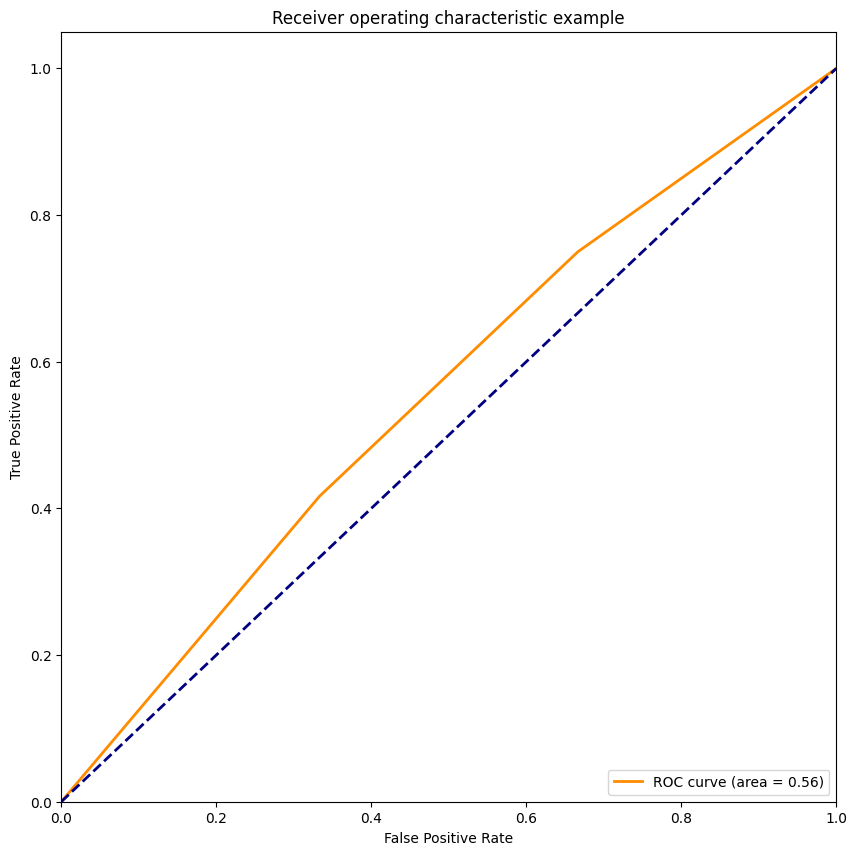

In [60]:
y_score = dt1.predict_proba(X_test)
fpr,tpr,threshold = roc_curve(y_test, y_score[:,1])
roc_auc = auc(fpr,tpr)
 
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

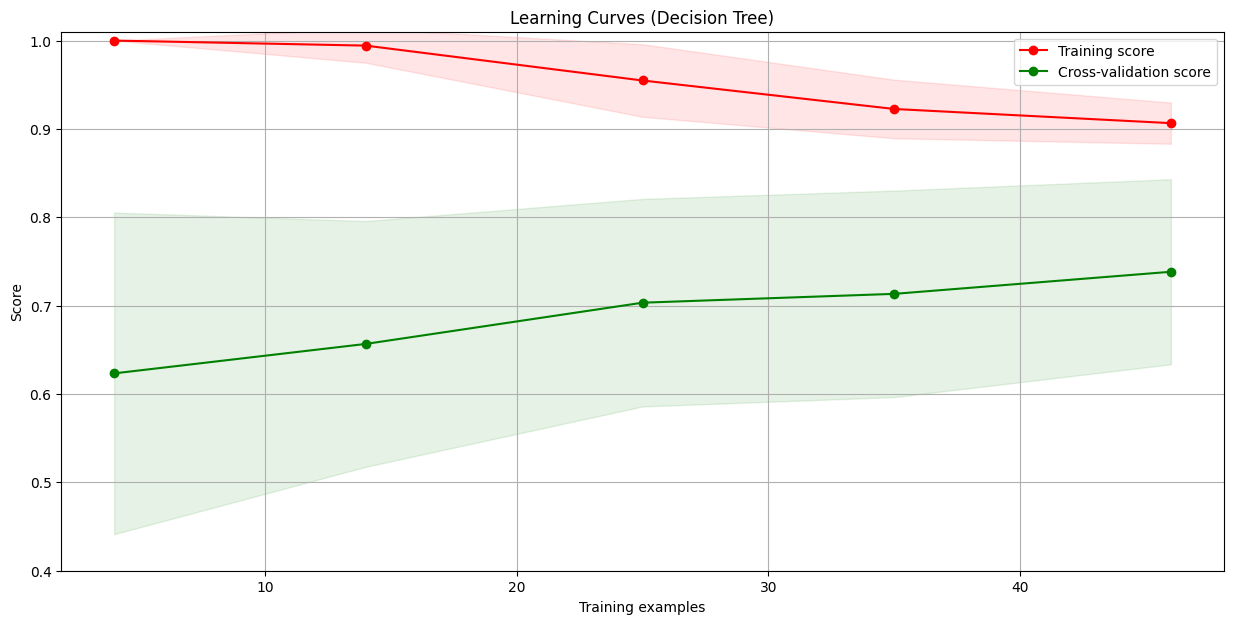

(0.7817030292354957, 0.2962626602018943)

In [61]:
title = "Learning Curves (Decision Tree)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = DecisionTreeClassifier(max_depth=3)
plot_learning_curve(estimator, title, X_train, y_train, ylim=(0.4, 1.01), cv=cv, n_jobs=4)

In [62]:
dt = tree.DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

[Text(0.6428571428571429, 0.9444444444444444, 'X[3] <= 0.1\ngini = 0.383\nsamples = 58\nvalue = [15, 43]'),
 Text(0.5714285714285714, 0.8333333333333334, 'X[1] <= -0.233\ngini = 0.306\nsamples = 53\nvalue = [10, 43]'),
 Text(0.42857142857142855, 0.7222222222222222, 'X[3] <= -0.167\ngini = 0.444\nsamples = 24\nvalue = [8, 16]'),
 Text(0.35714285714285715, 0.6111111111111112, 'X[1] <= -0.315\ngini = 0.32\nsamples = 20\nvalue = [4, 16]'),
 Text(0.2857142857142857, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.42857142857142855, 0.5, 'X[1] <= -0.248\ngini = 0.266\nsamples = 19\nvalue = [3, 16]'),
 Text(0.35714285714285715, 0.3888888888888889, 'X[3] <= -0.171\ngini = 0.198\nsamples = 18\nvalue = [2, 16]'),
 Text(0.21428571428571427, 0.2777777777777778, 'X[3] <= -0.211\ngini = 0.117\nsamples = 16\nvalue = [1, 15]'),
 Text(0.14285714285714285, 0.16666666666666666, 'X[3] <= -0.211\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.07142857142857142, 0.05555555555555555, 'gini = 0

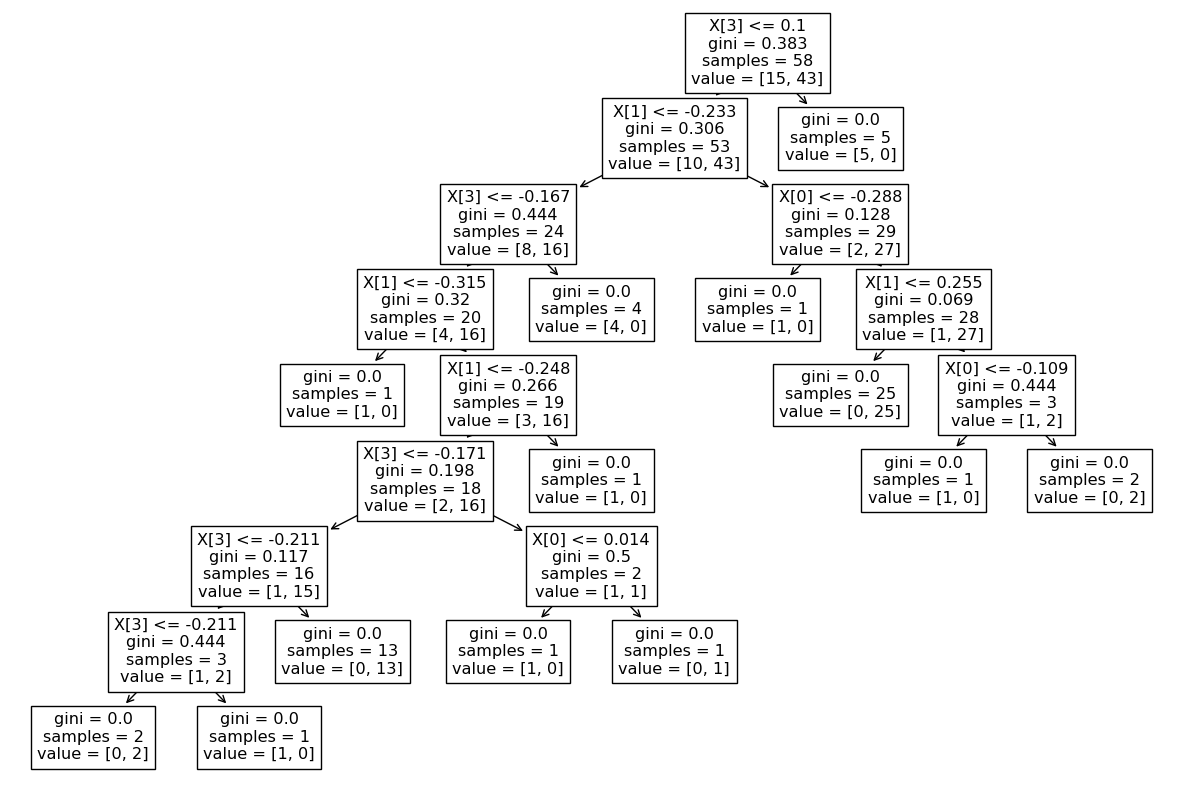

In [63]:
plt.figure(figsize=(15, 10))
tree.plot_tree(dt)

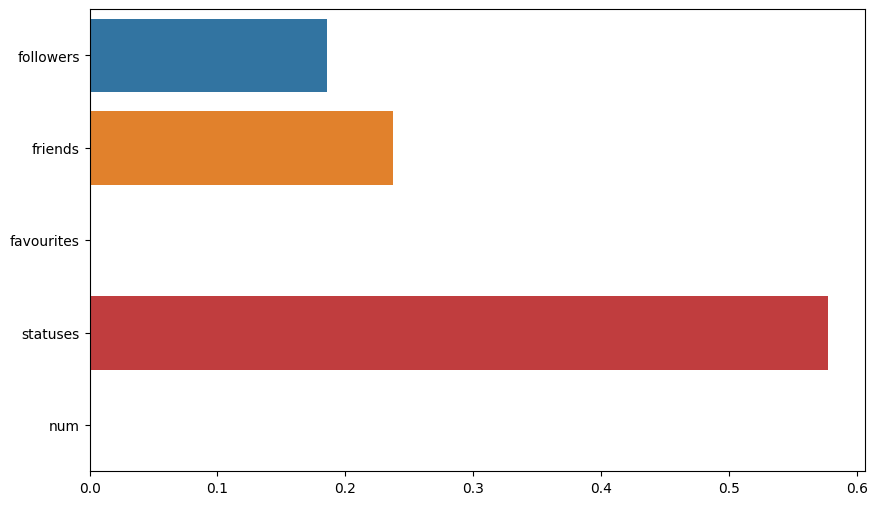

In [64]:
#Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x=dt.feature_importances_, y=df_X.columns)
plt.show()

In [65]:
#predictions
dt_preds = dt.predict(X_test)
print("Accuracy of train:",dt.score(X_train,y_train))
print("Accuracy of test:",accuracy_score(dt_preds,y_test))

Accuracy of train: 1.0
Accuracy of test: 0.6


In [66]:
print(classification_report(y_test,dt_preds))

              precision    recall  f1-score   support

           0       0.20      0.33      0.25         3
           1       0.80      0.67      0.73        12

    accuracy                           0.60        15
   macro avg       0.50      0.50      0.49        15
weighted avg       0.68      0.60      0.63        15



In [67]:
print(confusion_matrix(y_test, dt_preds))

[[1 2]
 [4 8]]


<Figure size 1500x700 with 0 Axes>

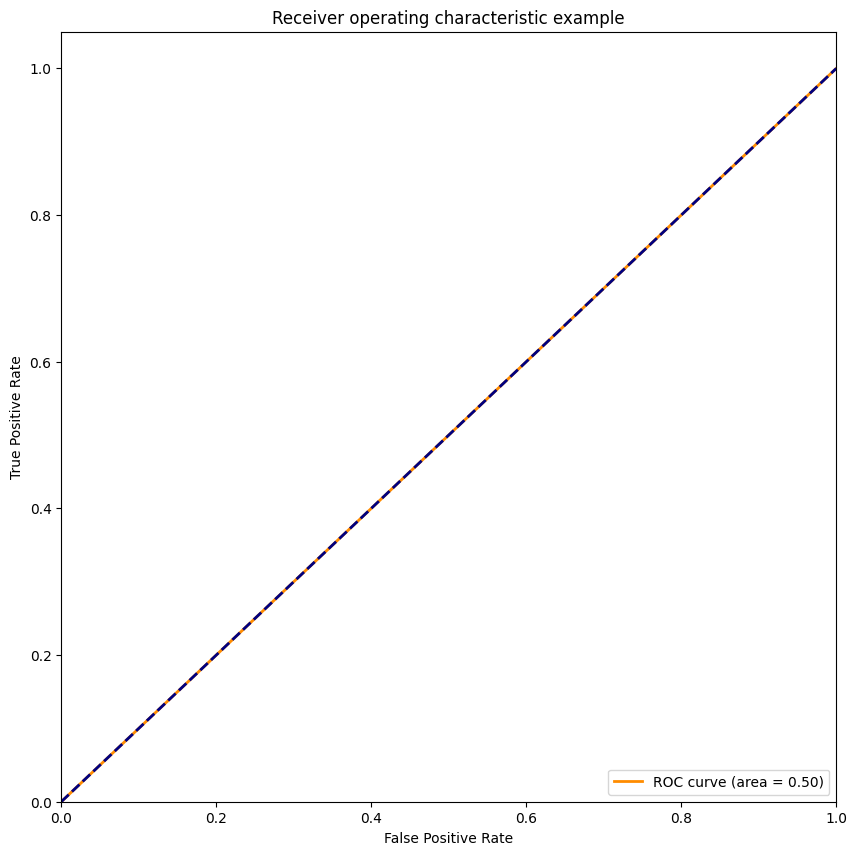

In [68]:
y_score = dt.predict_proba(X_test)
fpr,tpr,threshold = roc_curve(y_test, y_score[:,1])
roc_auc = auc(fpr,tpr)
 
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

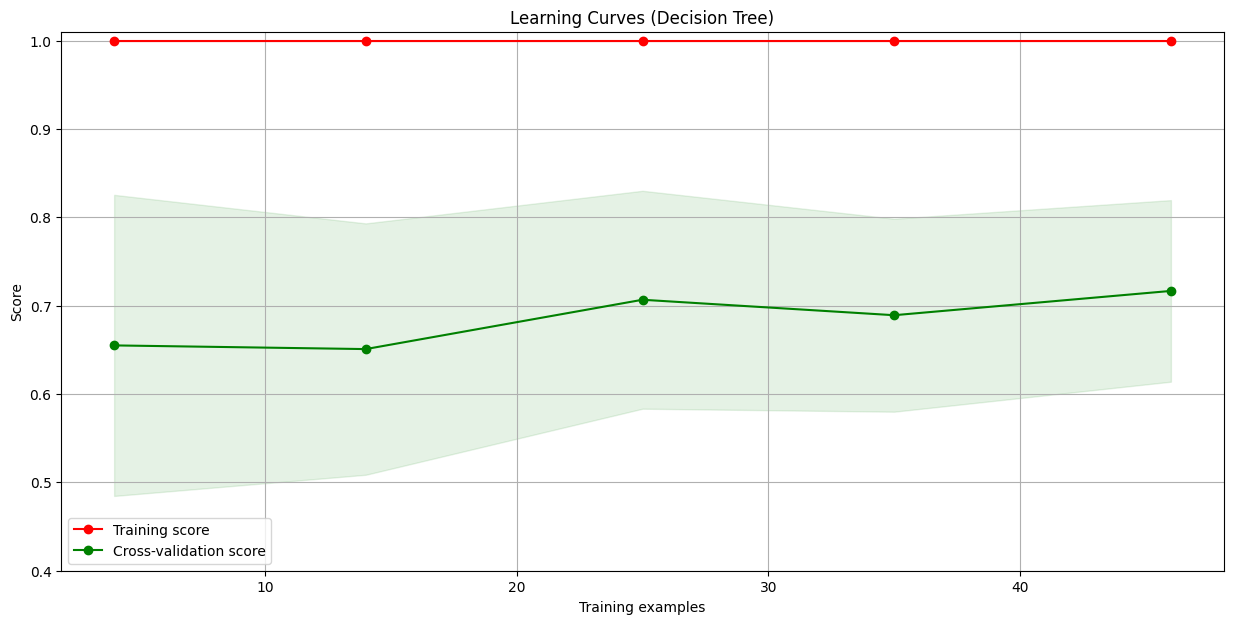

(0.8069632166419252, 0.38607356671614956)

In [69]:
title = "Learning Curves (Decision Tree)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = DecisionTreeClassifier()
plot_learning_curve(estimator, title, X_train, y_train, ylim=(0.4, 1.01), cv=cv, n_jobs=4)

### Random Forest

In [70]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
x_train=sc.fit_transform(X_train)
x_test=sc.transform(X_test)
y_train.shape,y_test.shape

((58,), (15,))

In [71]:
from sklearn.ensemble import RandomForestClassifier
rfr = RandomForestClassifier(max_depth=3,random_state=0)
rfr.fit(x_train, y_train)
y_pred=rfr.predict(x_test)
print("Accuracy of train:",rfr.score(X_train,y_train))
print('Accuracy of test: ',rfr.score(x_test, y_test))

Accuracy of train: 0.8620689655172413
Accuracy of test:  0.8


In [72]:
gsearch1_preds = rfr.predict(X_test)
print(classification_report(y_test,gsearch1_preds))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.80      1.00      0.89        12

    accuracy                           0.80        15
   macro avg       0.40      0.50      0.44        15
weighted avg       0.64      0.80      0.71        15



c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [73]:
print(confusion_matrix(y_test, gsearch1_preds))

[[ 0  3]
 [ 0 12]]


<Figure size 1500x700 with 0 Axes>

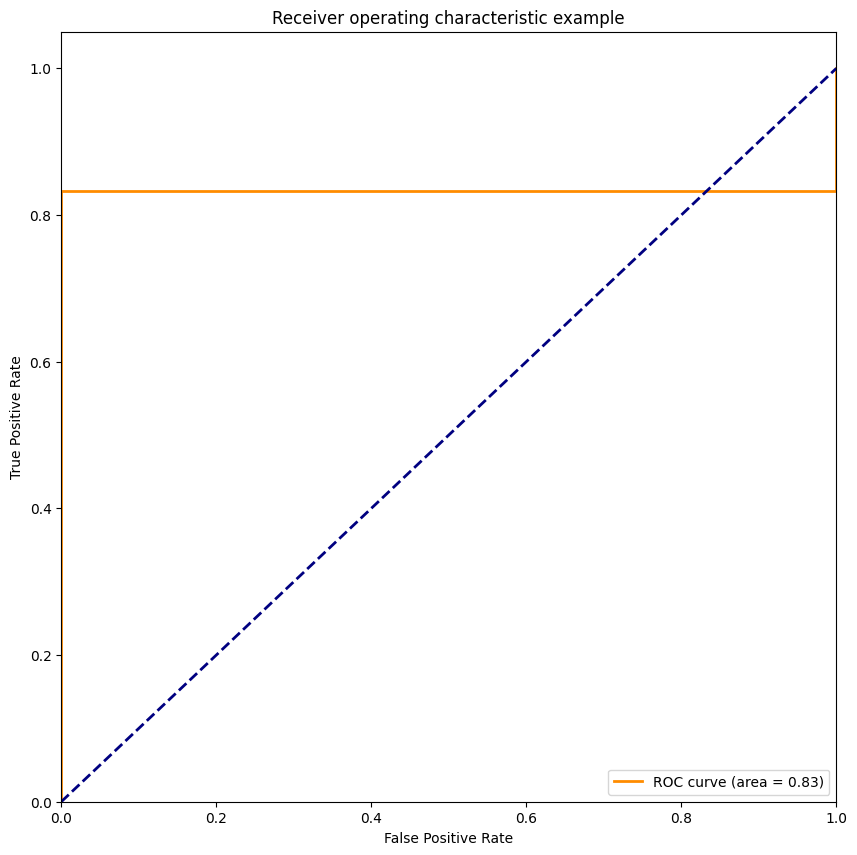

In [74]:
y_score = rfr.predict_proba(X_test)
fpr,tpr,threshold = roc_curve(y_test, y_score[:,1])
roc_auc = auc(fpr,tpr)
 
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

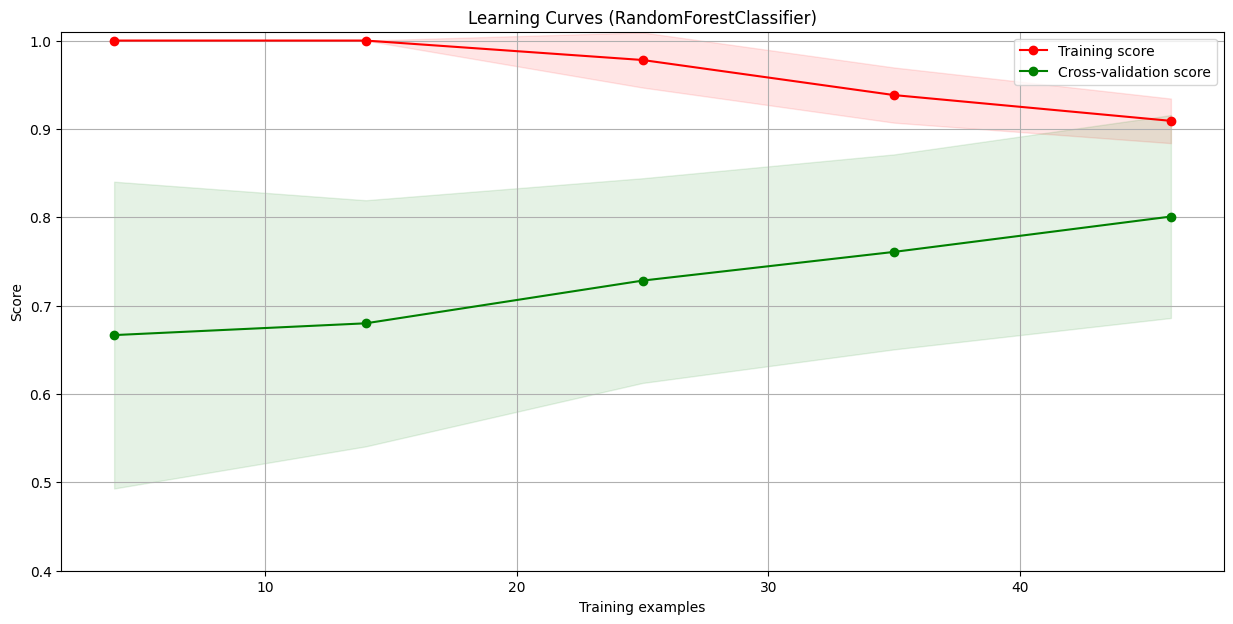

(0.8101981584396364, 0.2483368026370114)

In [75]:
title = "Learning Curves (RandomForestClassifier)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = RandomForestClassifier(max_depth=3,random_state=0)
plot_learning_curve(estimator, title, X_train, y_train, ylim=(0.4, 1.01), cv=cv, n_jobs=4)

In [76]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [77]:
param_test1 = {'n_estimators':range(10,100,10)}
gsearch1 = GridSearchCV(estimator = RandomForestClassifier(max_depth=18,max_features='sqrt' ,random_state=0), 
                       param_grid = param_test1,cv=5)
gsearch1.fit(x_train, y_train)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([0.01297407, 0.02352991, 0.03271761, 0.04428768, 0.06103654,
         0.06323752, 0.07856493, 0.09055662, 0.09653311]),
  'std_fit_time': array([0.00178009, 0.00173711, 0.0017172 , 0.00685814, 0.00364587,
         0.00150127, 0.00554249, 0.00640501, 0.00581791]),
  'mean_score_time': array([0.00199881, 0.0021987 , 0.00338287, 0.00417814, 0.00518632,
         0.0055841 , 0.00640197, 0.0083787 , 0.00798035]),
  'std_score_time': array([6.42281219e-04, 4.08053994e-04, 4.82163682e-04, 4.04714638e-04,
         3.99828455e-04, 4.88114995e-04, 4.87111327e-04, 2.32547759e-03,
         3.69664143e-06]),
  'param_n_estimators': masked_array(data=[10, 20, 30, 40, 50, 60, 70, 80, 90],
               mask=[False, False, False, False, False, False, False, False,
                     False],
         fill_value='?',
              dtype=object),
  'params': [{'n_estimators': 10},
   {'n_estimators': 20},
   {'n_estimators': 30},
   {'n_estimators': 40},
   {'n_estimators': 50}

In [78]:
param_test2 = {'max_depth':range(1,20,1)}
gsearch2 = GridSearchCV(estimator = RandomForestClassifier(n_estimators = 30),
   param_grid = param_test2,cv=5)
gsearch2.fit(x_train, y_train)
gsearch2.cv_results_, gsearch2.best_params_, gsearch2.best_score_

({'mean_fit_time': array([0.03551054, 0.03250628, 0.03371787, 0.03031263, 0.03091674,
         0.03331695, 0.03251643, 0.03150926, 0.03171496, 0.03052506,
         0.03351002, 0.03192048, 0.03231821, 0.03552475, 0.03531866,
         0.03231339, 0.03172169, 0.03191385, 0.03411541]),
  'std_fit_time': array([4.21546831e-03, 2.42001377e-03, 2.21559672e-03, 8.02441464e-04,
         6.31355706e-04, 1.36046081e-03, 2.03557382e-03, 5.10333164e-04,
         3.98898762e-04, 4.89962875e-04, 3.23850518e-03, 1.32165636e-05,
         1.01277641e-03, 4.92070194e-03, 2.85911971e-03, 1.86660283e-03,
         4.06262841e-04, 2.53906984e-03, 4.10350454e-03]),
  'mean_score_time': array([0.0031919 , 0.00279255, 0.00299115, 0.00299139, 0.00299907,
         0.00319157, 0.00319366, 0.00299835, 0.00319133, 0.00279307,
         0.00359778, 0.00319142, 0.00359402, 0.00337801, 0.00377483,
         0.00300016, 0.00318475, 0.00338497, 0.00357585]),
  'std_score_time': array([7.46568566e-04, 3.98969722e-04, 6.3067

In [79]:
from sklearn.metrics import classification_report
rfr = RandomForestClassifier(max_depth=2,random_state=0,n_estimators=30)
rfr.fit(x_train, y_train)
y_pred=rfr.predict(x_test)
print('Accuracy of train:',rfr.score(x_train, y_train))
print('Accuracy of test:',rfr.score(x_test, y_test))

Accuracy of train: 0.8448275862068966
Accuracy of test: 0.8


In [80]:
gsearch1_preds = rfr.predict(X_test)
print(classification_report(y_test,gsearch1_preds))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.80      1.00      0.89        12

    accuracy                           0.80        15
   macro avg       0.40      0.50      0.44        15
weighted avg       0.64      0.80      0.71        15



c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [81]:
print(confusion_matrix(y_test, gsearch1_preds))

[[ 0  3]
 [ 0 12]]


<Figure size 1500x700 with 0 Axes>

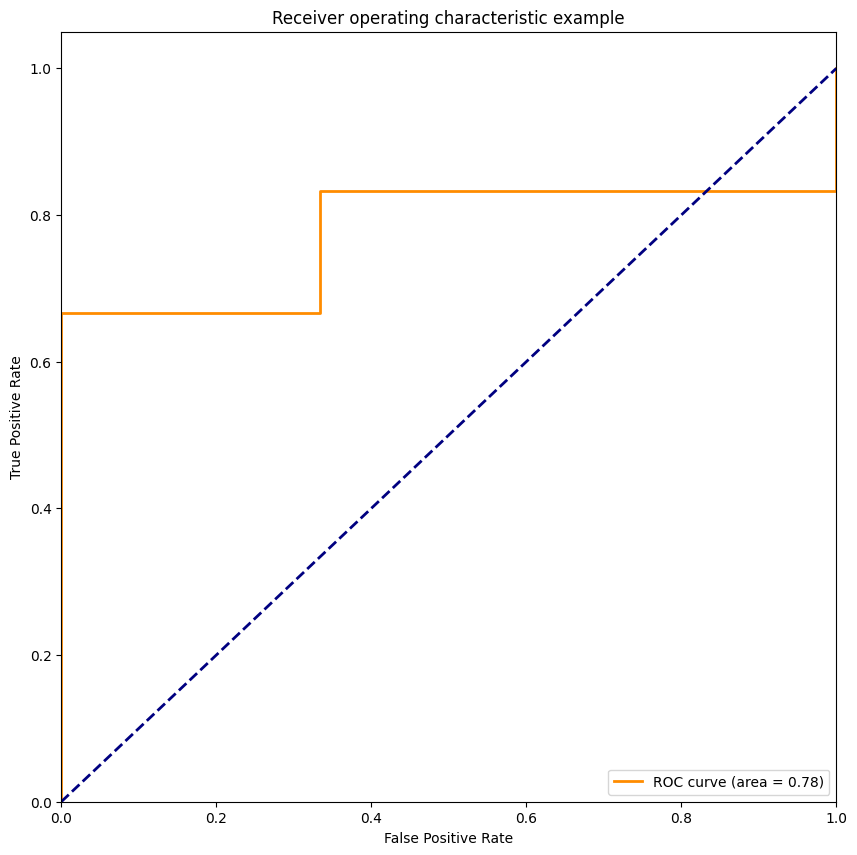

In [82]:
y_score = rfr.predict_proba(X_test)
fpr,tpr,threshold = roc_curve(y_test, y_score[:,1])
roc_auc = auc(fpr,tpr)
 
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

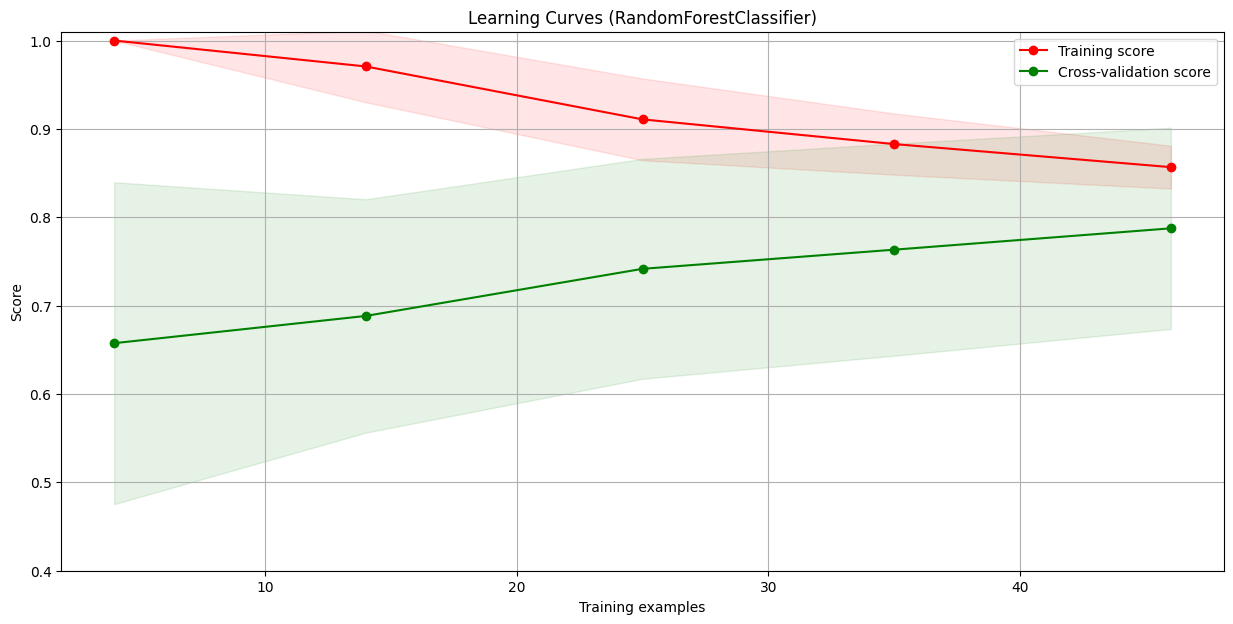

(0.7772924604694651, 0.20734576041753772)

In [83]:
title = "Learning Curves (RandomForestClassifier)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = RandomForestClassifier(max_depth=2,random_state=0,n_estimators=30)
plot_learning_curve(estimator, title, X_train, y_train, ylim=(0.4, 1.01), cv=cv, n_jobs=4)

### Neural Network

In [84]:
from sklearn.neural_network import MLPClassifier
# initialize model
clf = MLPClassifier(hidden_layer_sizes=(5,4), activation='relu', max_iter=500, random_state=0)
print(clf)
# training
clf.fit(x_train,y_train)
# testing
print("Accuracy of train:",clf.score(X_train,y_train))
print("Accuracy of test:",clf.score(x_test,y_test))

MLPClassifier(hidden_layer_sizes=(5, 4), max_iter=500, random_state=0)
Accuracy of train: 0.8275862068965517
Accuracy of test: 0.8666666666666667


c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [85]:
# initialize model
clf = MLPClassifier(hidden_layer_sizes=(10,4), activation='relu', max_iter=500, random_state=0)
# training
clf.fit(x_train,y_train)
# testing
print("Accuracy of train:",clf.score(X_train,y_train))
print("Accuracy of test:",clf.score(x_test,y_test))

Accuracy of train: 0.8275862068965517
Accuracy of test: 0.8


c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [86]:
# initialize model
clf = MLPClassifier(hidden_layer_sizes=(20,4), activation='relu', max_iter=500, random_state=0)
# training
clf.fit(x_train,y_train)
# testing
print("Accuracy of train:",clf.score(X_train,y_train))
print("Accuracy of test:",clf.score(x_test,y_test))

Accuracy of train: 0.8448275862068966
Accuracy of test: 0.8


c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [87]:
# initialize model
clf = MLPClassifier(hidden_layer_sizes=(15,4), activation='relu', max_iter=500, random_state=0)
# training
clf.fit(x_train,y_train)
# testing
print("Accuracy of train:",clf.score(X_train,y_train))
print("Accuracy of test:",clf.score(x_test,y_test))

Accuracy of train: 0.8620689655172413
Accuracy of test: 0.8


c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [88]:
%timeit 
mlp_tuned_parameters = {"hidden_layer_sizes": [(16,4),(18, 4),(20,4),(22,4)],
                        'activation': ['identity', 'logistic', 'tanh', 'relu'],
                        "solver": ['adam', 'sgd', 'lbfgs'],
                       'learning_rate': ['constant','adaptive']}
mlp = MLPClassifier(max_iter=500)
estimator = GridSearchCV(mlp, mlp_tuned_parameters, n_jobs=5)
estimator.fit(X_train, y_train)

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


GridSearchCV(estimator=MLPClassifier(max_iter=500), n_jobs=5,
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'hidden_layer_sizes': [(16, 4), (18, 4), (20, 4),
                                                (22, 4)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['adam', 'sgd', 'lbfgs']})

In [89]:
print(estimator.best_params_)

{'activation': 'tanh', 'hidden_layer_sizes': (20, 4), 'learning_rate': 'constant', 'solver': 'adam'}


In [90]:
mlp = MLPClassifier(hidden_layer_sizes=(20,4), max_iter=500,learning_rate='constant',solver='adam',activation='tanh')
mlp.fit(X_train, y_train)
print("Accuracy of train:",mlp.score(X_train,y_train))
print("Accuracy of test:",mlp.score(x_test,y_test))

Accuracy of train: 0.8793103448275862
Accuracy of test: 0.8


c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [91]:
predictions = mlp.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.80      1.00      0.89        12

    accuracy                           0.80        15
   macro avg       0.40      0.50      0.44        15
weighted avg       0.64      0.80      0.71        15



c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [92]:
print(confusion_matrix(y_test, predictions))

[[ 0  3]
 [ 0 12]]


<Figure size 1500x700 with 0 Axes>

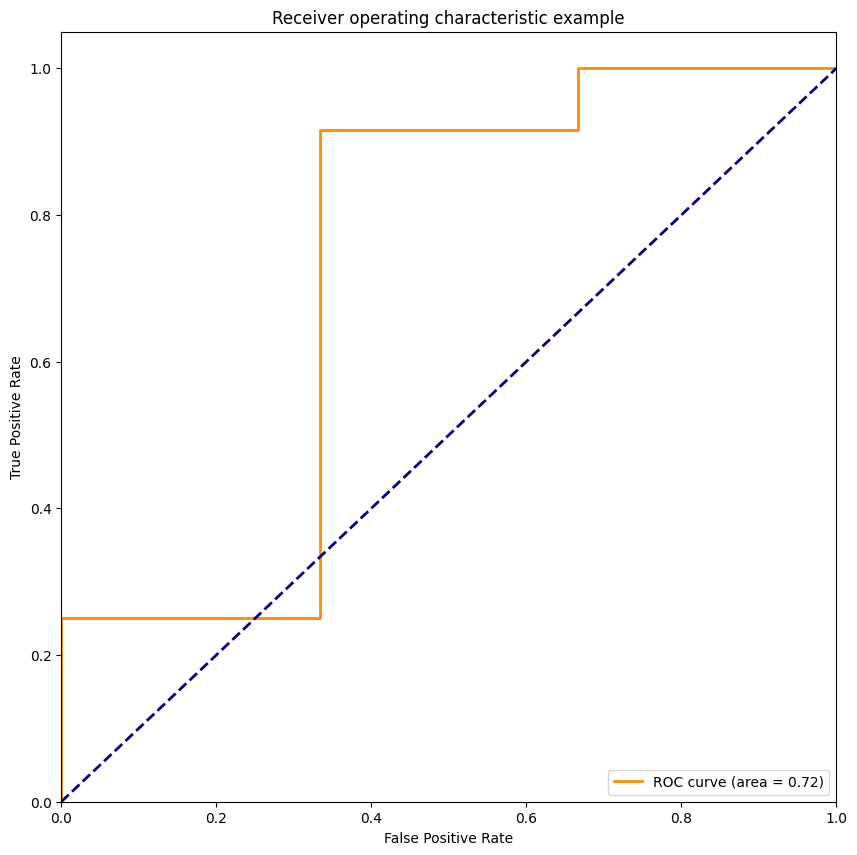

In [93]:
y_score = mlp.predict_proba(X_test)
fpr,tpr,threshold = roc_curve(y_test, y_score[:,1])
roc_auc = auc(fpr,tpr)
 
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

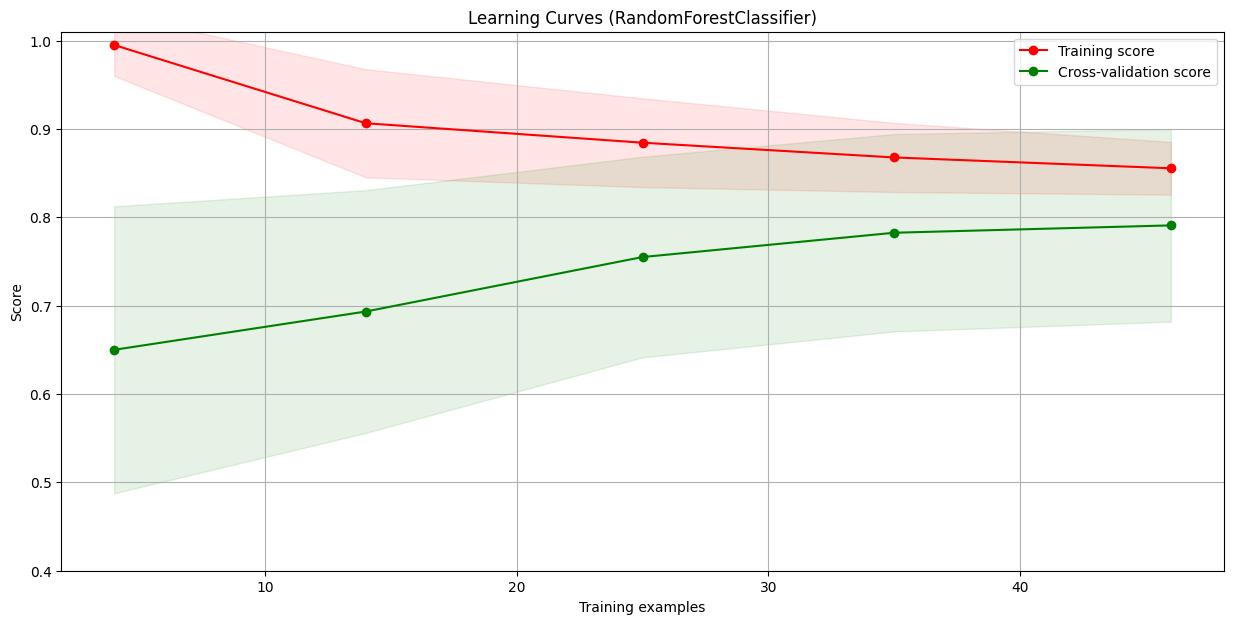

(0.7835827096518602, 0.20343732706164308)

In [94]:
title = "Learning Curves (RandomForestClassifier)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = MLPClassifier(hidden_layer_sizes=(20,4), max_iter=500,learning_rate='constant',solver='adam',activation='tanh')
plot_learning_curve(estimator, title, X_train, y_train, ylim=(0.4, 1.01), cv=cv, n_jobs=4)

## After imbalance data processing

### Logistics Regression

In [36]:
from imblearn.over_sampling import SMOTE
X_train, y_train = SMOTE().fit_resample(X_train, y_train)

In [37]:
log_reg_model = LogisticRegression().fit(X_train, y_train)
log_reg_pred = log_reg_model.predict(X_test)
print("Accuracy of train:",log_reg_model.score(X_train,y_train))
print("Accuracy of test:",accuracy_score(log_reg_pred,y_test))
print('coef:',log_reg_model.coef_)
print('intercept:',log_reg_model.intercept_)

Accuracy of train: 0.7325581395348837
Accuracy of test: 0.8
coef: [[ 4.91318262e-04  5.01784081e-04  5.84487490e-07 -6.99046402e-05
  -9.95778849e-04]]
intercept: [0.76440893]


In [38]:
print(classification_report(y_test, log_reg_pred))

              precision    recall  f1-score   support

           0       0.50      0.67      0.57         3
           1       0.91      0.83      0.87        12

    accuracy                           0.80        15
   macro avg       0.70      0.75      0.72        15
weighted avg       0.83      0.80      0.81        15



In [39]:
print(confusion_matrix(y_test, log_reg_pred))

[[ 2  1]
 [ 2 10]]


In [40]:
from sklearn.metrics import roc_curve, auc

<Figure size 1500x700 with 0 Axes>

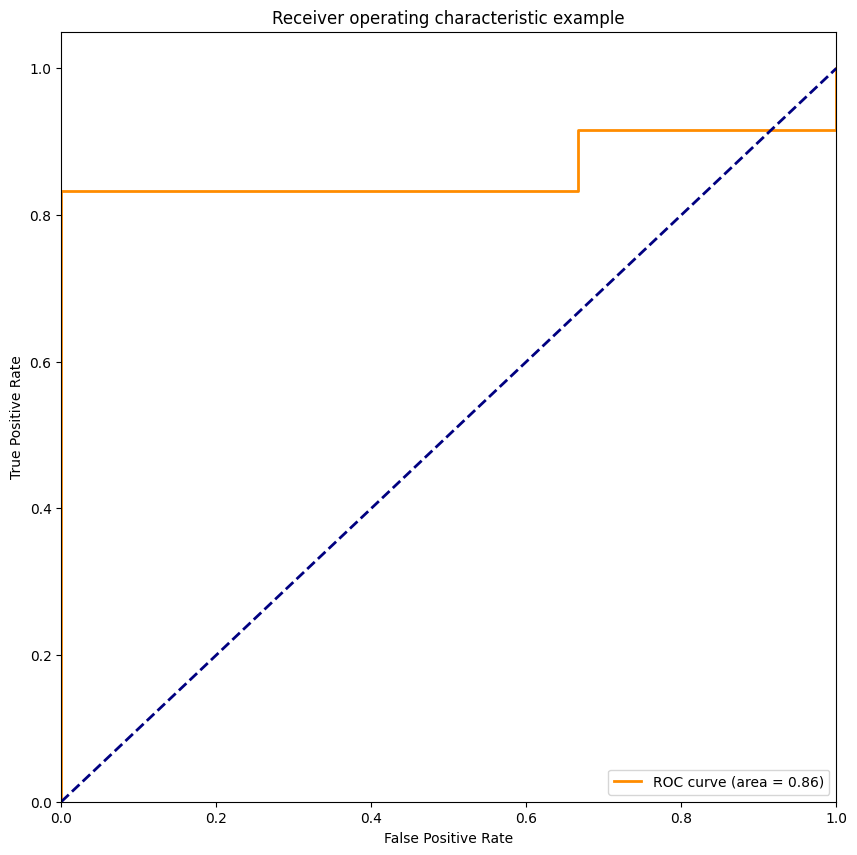

In [41]:
y_score = log_reg_model.predict_proba(X_test)
fpr,tpr,threshold = roc_curve(y_test, y_score[:,1])
roc_auc = auc(fpr,tpr)
 
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

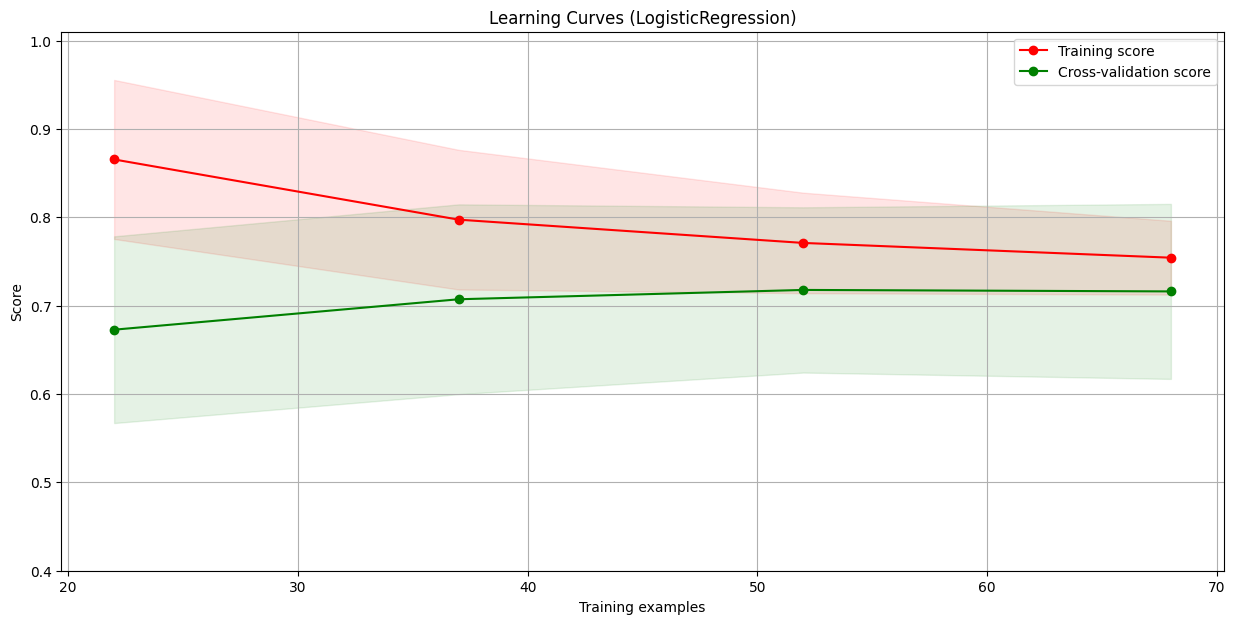

(0.706552134738048, 0.17895610747714796)

In [42]:
title = "Learning Curves (LogisticRegression)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = LogisticRegression()
plot_learning_curve(estimator, title, X_train, y_train, ylim=(0.4, 1.01), cv=cv, n_jobs=4)

### Naive Bayes

In [43]:
from sklearn.naive_bayes import GaussianNB

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [44]:
nb_model = GaussianNB().fit(X_train,y_train)
nb_pred = nb_model.predict(X_test)
print("Accuracy of train:",nb_model.score(X_train,y_train))
print("Accuracy of test:",accuracy_score(nb_pred,y_test))

Accuracy of train: 0.7093023255813954
Accuracy of test: 0.8


In [45]:
#predictions
nb_model_preds = nb_model.predict(X_test)
print(classification_report(y_test,nb_model_preds))

              precision    recall  f1-score   support

           0       0.50      0.67      0.57         3
           1       0.91      0.83      0.87        12

    accuracy                           0.80        15
   macro avg       0.70      0.75      0.72        15
weighted avg       0.83      0.80      0.81        15



In [46]:
print(confusion_matrix(y_test, nb_pred))

[[ 2  1]
 [ 2 10]]


<Figure size 1500x700 with 0 Axes>

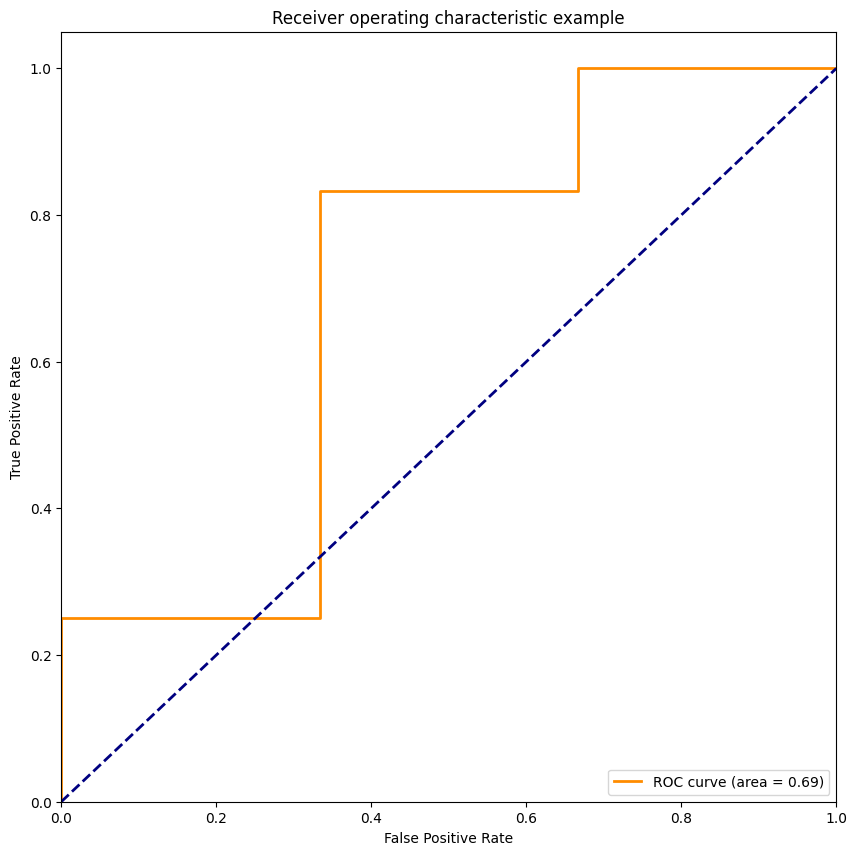

In [47]:
y_score = nb_model.predict_proba(X_test)
fpr,tpr,threshold = roc_curve(y_test, y_score[:,1])
roc_auc = auc(fpr,tpr)
 
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

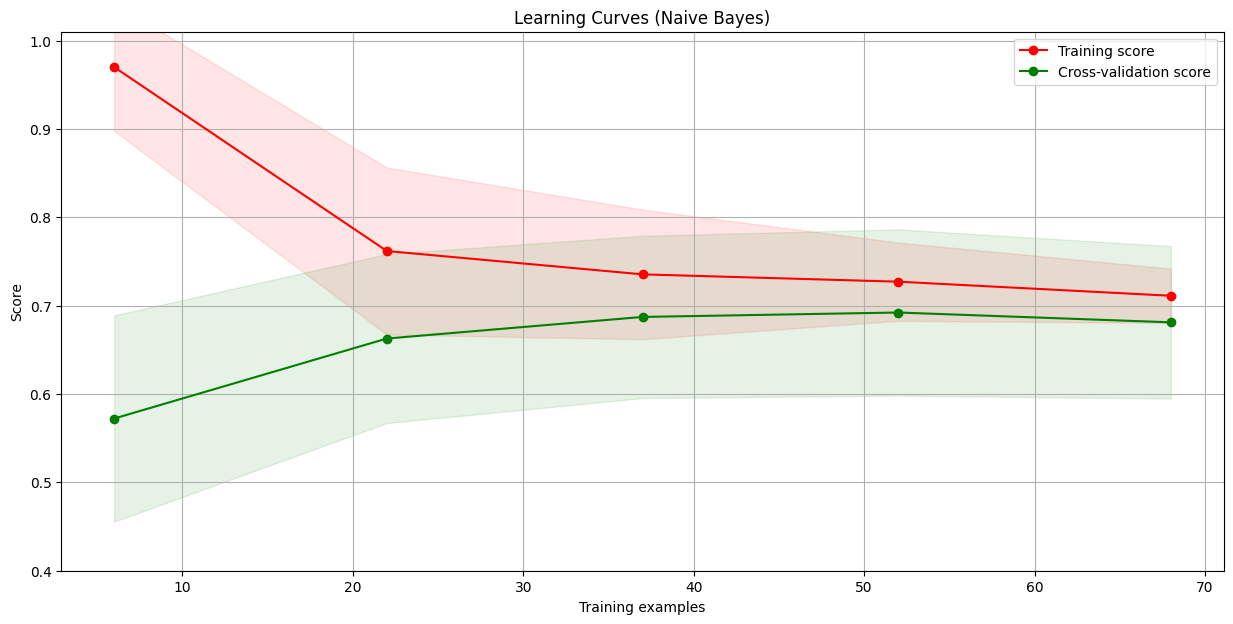

(0.668371309218657, 0.1470970923515703)

In [48]:
title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = GaussianNB()
plot_learning_curve(estimator, title, X_train, y_train, ylim=(0.4, 1.01), cv=cv, n_jobs=4)

### SVM

In [49]:
from sklearn.svm import SVC

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model_SVC = SVC(C=0.8, kernel='rbf', gamma=20, decision_function_shape='ovr',probability=True)
SVC_mol=model_SVC.fit(X_train, y_train)

In [50]:
pred_SVC = model_SVC.predict(X_test)
print("Accuracy of train:",model_SVC.score(X_train,y_train))
print("Accuracy of test:",accuracy_score(pred_SVC,y_test))

Accuracy of train: 0.9418604651162791
Accuracy of test: 0.6


In [51]:
pred_SVC = SVC_mol.predict(X_test)
print(classification_report(y_test,pred_SVC))

              precision    recall  f1-score   support

           0       0.20      0.33      0.25         3
           1       0.80      0.67      0.73        12

    accuracy                           0.60        15
   macro avg       0.50      0.50      0.49        15
weighted avg       0.68      0.60      0.63        15



In [52]:
print(confusion_matrix(y_test, pred_SVC))

[[1 2]
 [4 8]]


<Figure size 1500x700 with 0 Axes>

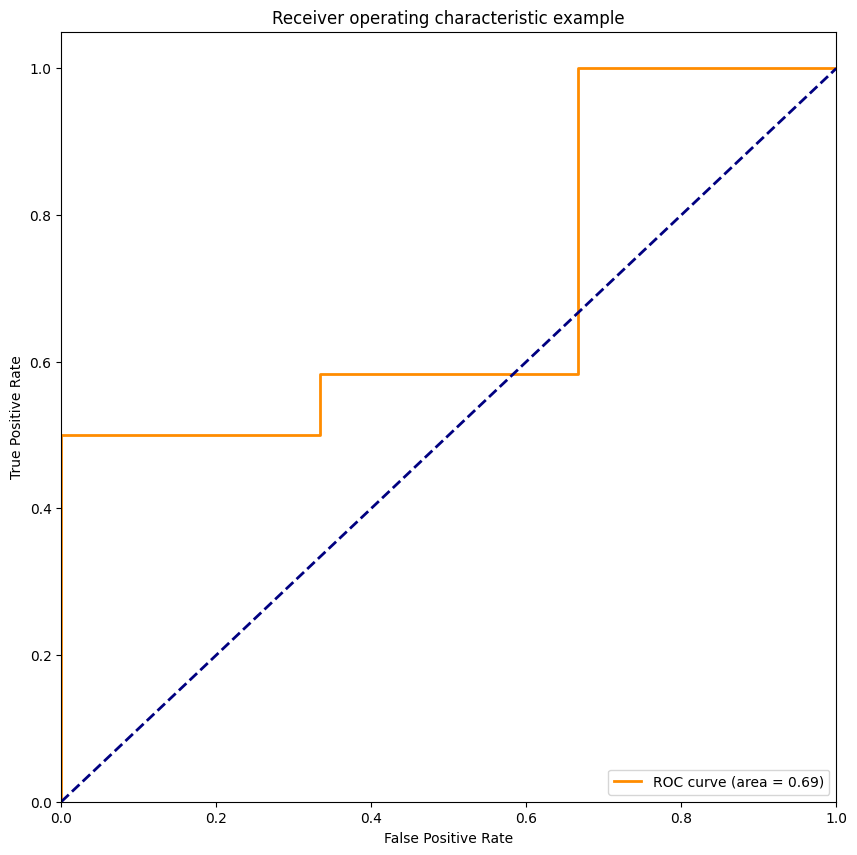

In [53]:
y_score = model_SVC.predict_proba(X_test)
fpr,tpr,threshold = roc_curve(y_test, y_score[:,1])
roc_auc = auc(fpr,tpr)
 
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

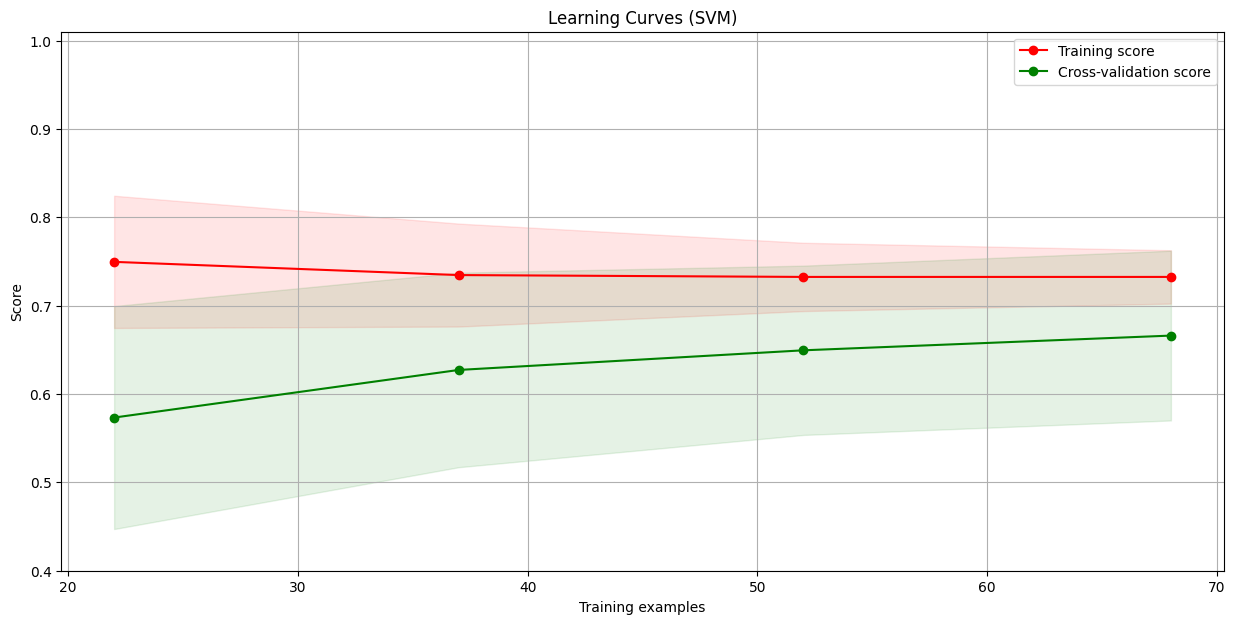

(0.6663680511457557, 0.19263973902380915)

In [54]:
title = "Learning Curves (SVM)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = SVC()
plot_learning_curve(estimator, title, X_train, y_train, ylim=(0.4, 1.01), cv=cv, n_jobs=4)

### Decision Tree

In [55]:
from sklearn import tree
dt1 = tree.DecisionTreeClassifier(max_depth=3)
dt1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

[Text(0.5416666666666666, 0.875, 'X[3] <= -0.239\ngini = 0.5\nsamples = 86\nvalue = [43, 43]'),
 Text(0.3333333333333333, 0.625, 'X[0] <= -0.297\ngini = 0.433\nsamples = 60\nvalue = [19, 41]'),
 Text(0.16666666666666666, 0.375, 'X[3] <= -0.329\ngini = 0.475\nsamples = 18\nvalue = [11, 7]'),
 Text(0.08333333333333333, 0.125, 'gini = 0.346\nsamples = 9\nvalue = [2, 7]'),
 Text(0.25, 0.125, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(0.5, 0.375, 'X[4] <= 1.261\ngini = 0.308\nsamples = 42\nvalue = [8, 34]'),
 Text(0.4166666666666667, 0.125, 'gini = 0.255\nsamples = 40\nvalue = [6, 34]'),
 Text(0.5833333333333334, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.75, 0.625, 'X[4] <= -0.665\ngini = 0.142\nsamples = 26\nvalue = [24, 2]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8333333333333334, 0.375, 'X[4] <= -0.126\ngini = 0.077\nsamples = 25\nvalue = [24, 1]'),
 Text(0.75, 0.125, 'gini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Tex

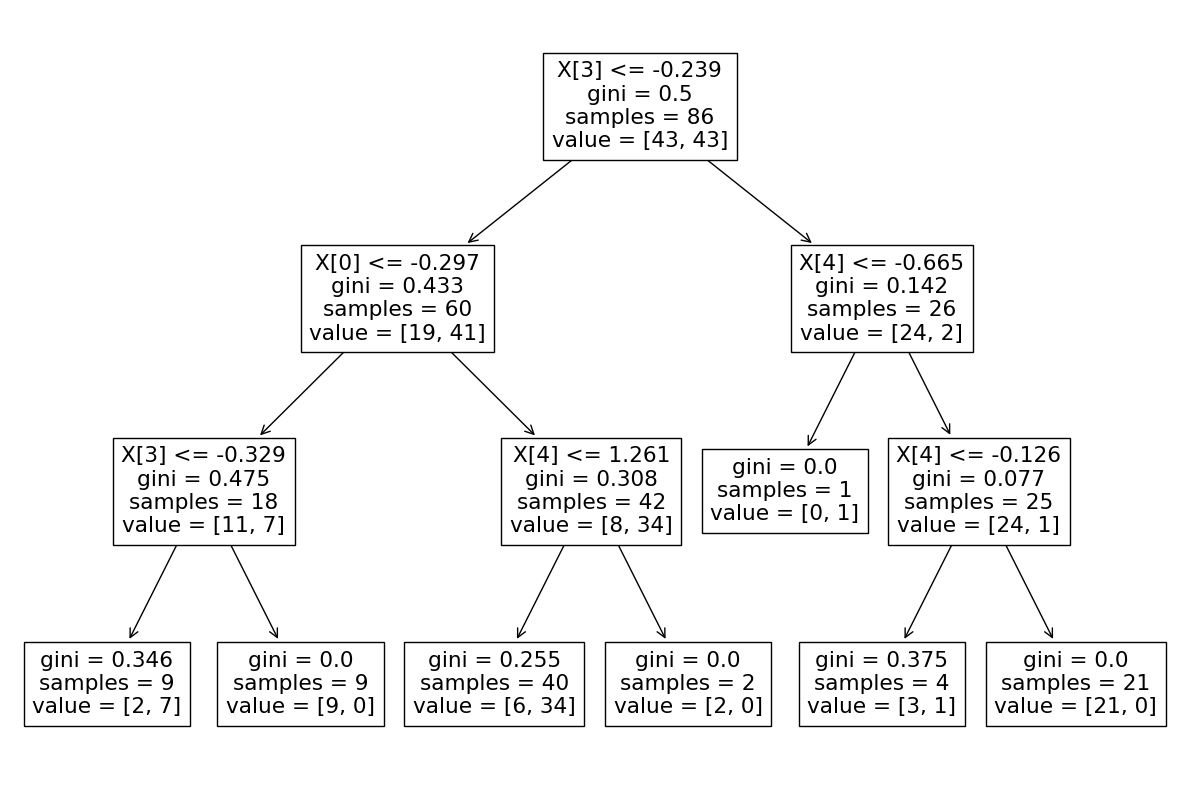

In [56]:
plt.figure(figsize=(15, 10))
tree.plot_tree(dt1)

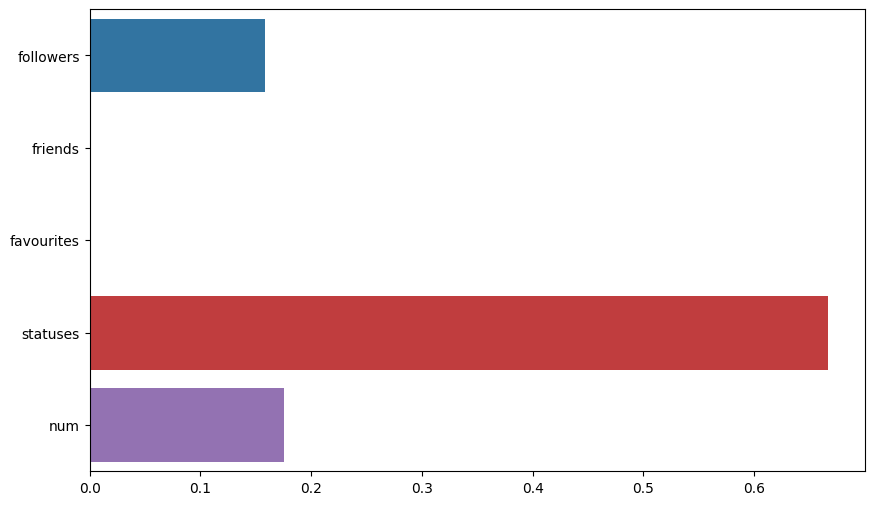

In [57]:
plt.figure(figsize=(10, 6))
sns.barplot(x=dt1.feature_importances_, y=df_X.columns)
plt.show()

In [58]:
#predictions
dt_preds = dt1.predict(X_test)
print("Accuracy of train:",dt1.score(X_train,y_train))
print("Accuracy of test:",accuracy_score(dt_preds,y_test))

Accuracy of train: 0.8953488372093024
Accuracy of test: 0.7333333333333333


In [59]:
print(classification_report(y_test,dt_preds))

              precision    recall  f1-score   support

           0       0.40      0.67      0.50         3
           1       0.90      0.75      0.82        12

    accuracy                           0.73        15
   macro avg       0.65      0.71      0.66        15
weighted avg       0.80      0.73      0.75        15



In [60]:
print(confusion_matrix(y_test, dt_preds))

[[2 1]
 [3 9]]


<Figure size 1500x700 with 0 Axes>

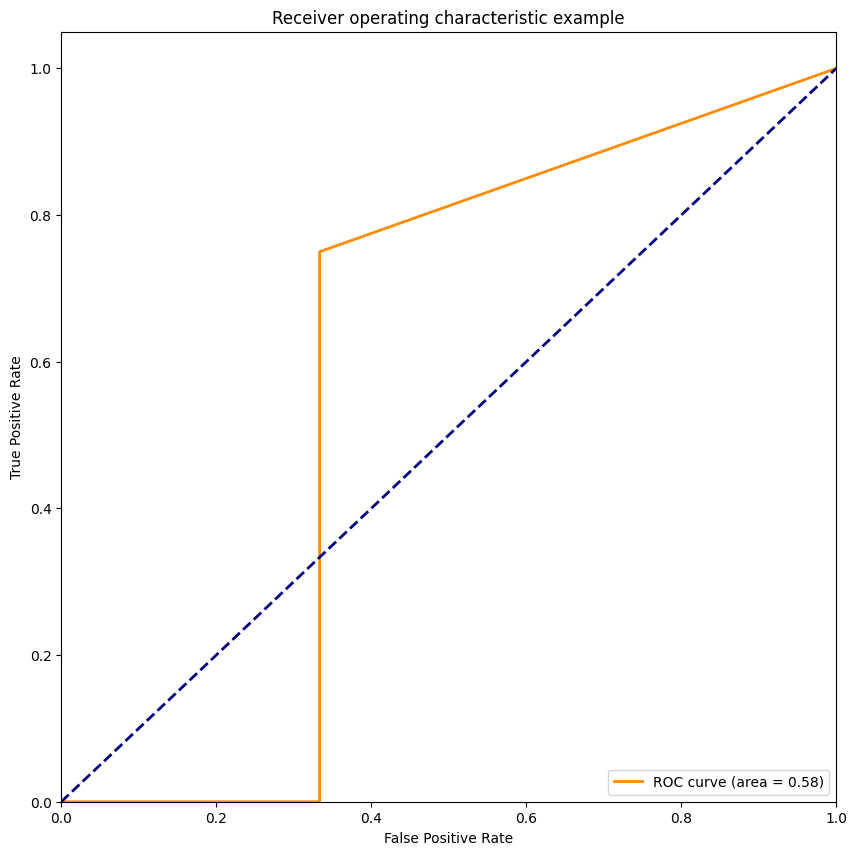

In [61]:
y_score = dt1.predict_proba(X_test)
fpr,tpr,threshold = roc_curve(y_test, y_score[:,1])
roc_auc = auc(fpr,tpr)
 
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

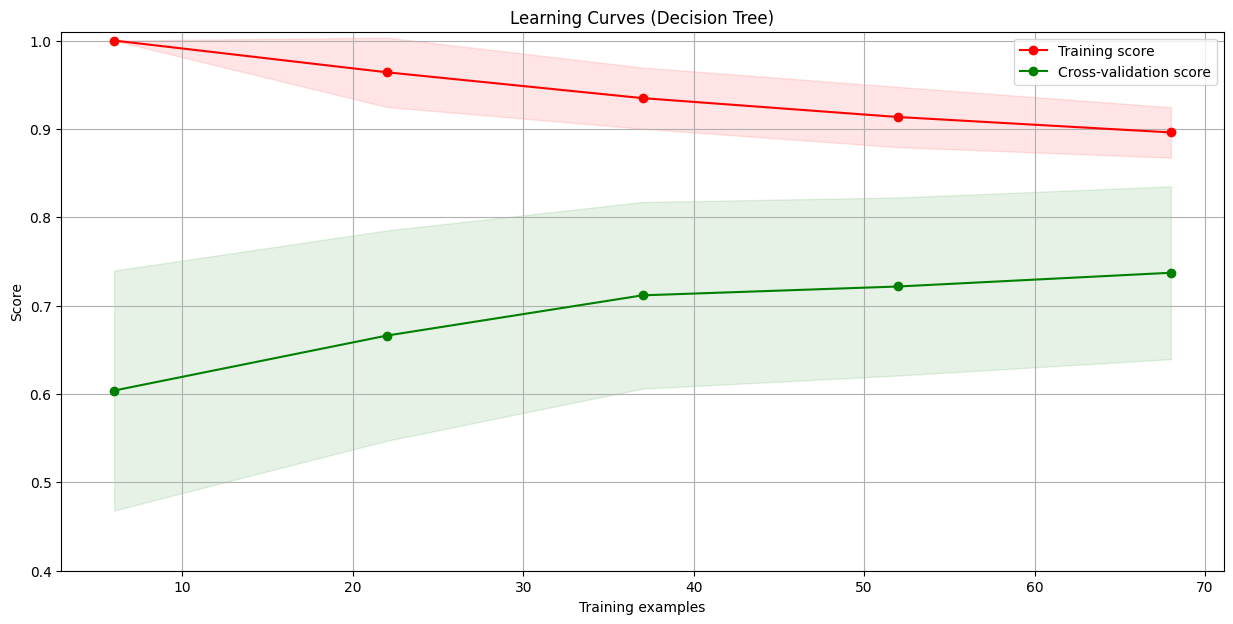

(0.7820084222019545, 0.2851121720497881)

In [62]:
title = "Learning Curves (Decision Tree)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = DecisionTreeClassifier(max_depth=3)
plot_learning_curve(estimator, title, X_train, y_train, ylim=(0.4, 1.01), cv=cv, n_jobs=4)

In [63]:
dt = tree.DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

[Text(0.5833333333333334, 0.9285714285714286, 'X[3] <= -0.239\ngini = 0.5\nsamples = 86\nvalue = [43, 43]'),
 Text(0.36666666666666664, 0.7857142857142857, 'X[0] <= -0.297\ngini = 0.433\nsamples = 60\nvalue = [19, 41]'),
 Text(0.2, 0.6428571428571429, 'X[3] <= -0.329\ngini = 0.475\nsamples = 18\nvalue = [11, 7]'),
 Text(0.13333333333333333, 0.5, 'X[1] <= -0.293\ngini = 0.346\nsamples = 9\nvalue = [2, 7]'),
 Text(0.06666666666666667, 0.35714285714285715, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.2, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.26666666666666666, 0.5, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(0.5333333333333333, 0.6428571428571429, 'X[4] <= 1.261\ngini = 0.308\nsamples = 42\nvalue = [8, 34]'),
 Text(0.4666666666666667, 0.5, 'X[3] <= -0.323\ngini = 0.255\nsamples = 40\nvalue = [6, 34]'),
 Text(0.3333333333333333, 0.35714285714285715, 'X[4] <= -0.657\ngini = 0.486\nsamples = 12\nvalue = [5, 7]'),
 Text(0.26666666666666666, 0.214

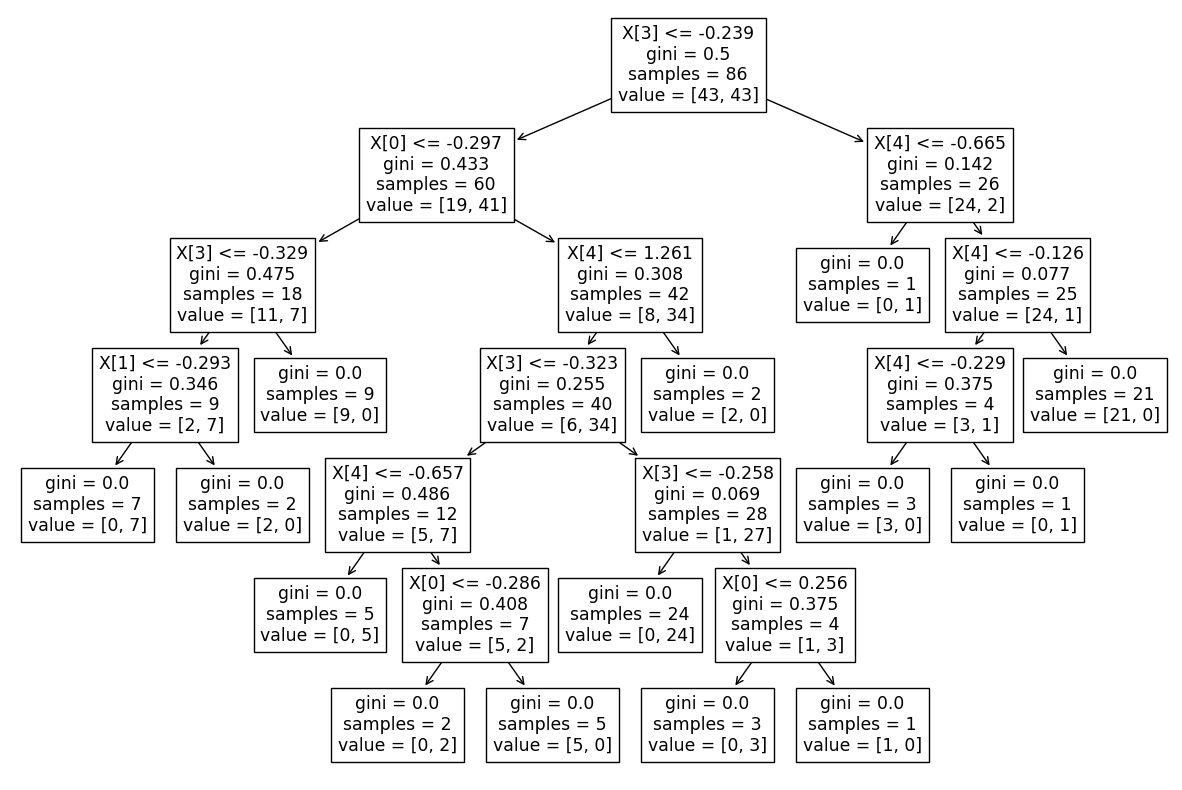

In [64]:
plt.figure(figsize=(15, 10))
tree.plot_tree(dt)

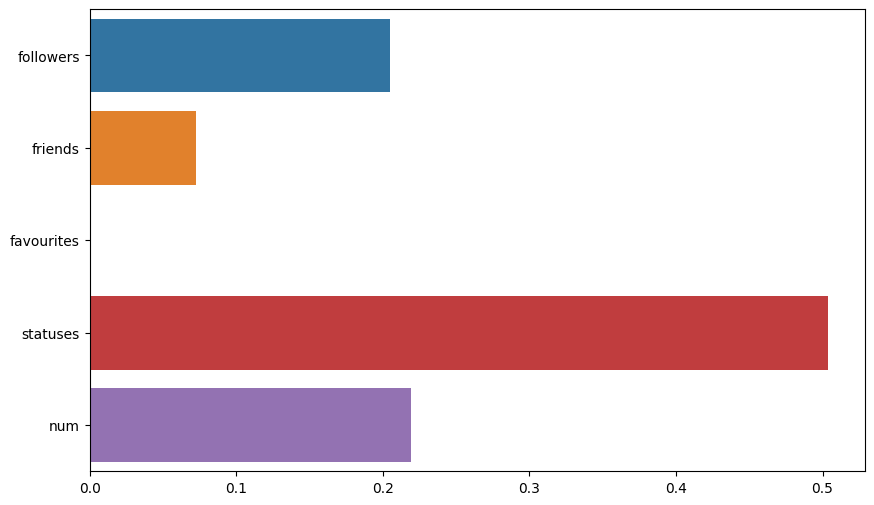

In [65]:
#Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x=dt.feature_importances_, y=df_X.columns)
plt.show()

In [66]:
#predictions
dt_preds = dt.predict(X_test)
print("Accuracy of train:",dt1.score(X_train,y_train))
print("Accuracy of test:",accuracy_score(dt_preds,y_test))

Accuracy of train: 0.8953488372093024
Accuracy of test: 0.6


In [67]:
print(classification_report(y_test,dt_preds))

              precision    recall  f1-score   support

           0       0.29      0.67      0.40         3
           1       0.88      0.58      0.70        12

    accuracy                           0.60        15
   macro avg       0.58      0.62      0.55        15
weighted avg       0.76      0.60      0.64        15



In [68]:
print(confusion_matrix(y_test, dt_preds))

[[2 1]
 [5 7]]


<Figure size 1500x700 with 0 Axes>

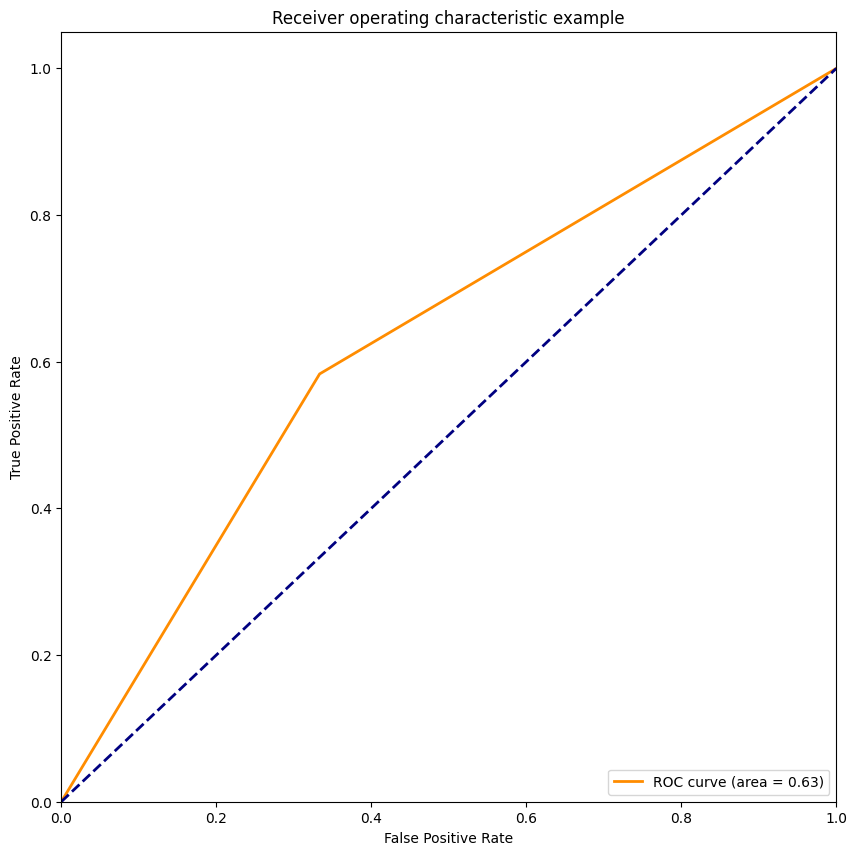

In [69]:
y_score = dt.predict_proba(X_test)
fpr,tpr,threshold = roc_curve(y_test, y_score[:,1])
roc_auc = auc(fpr,tpr)
 
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

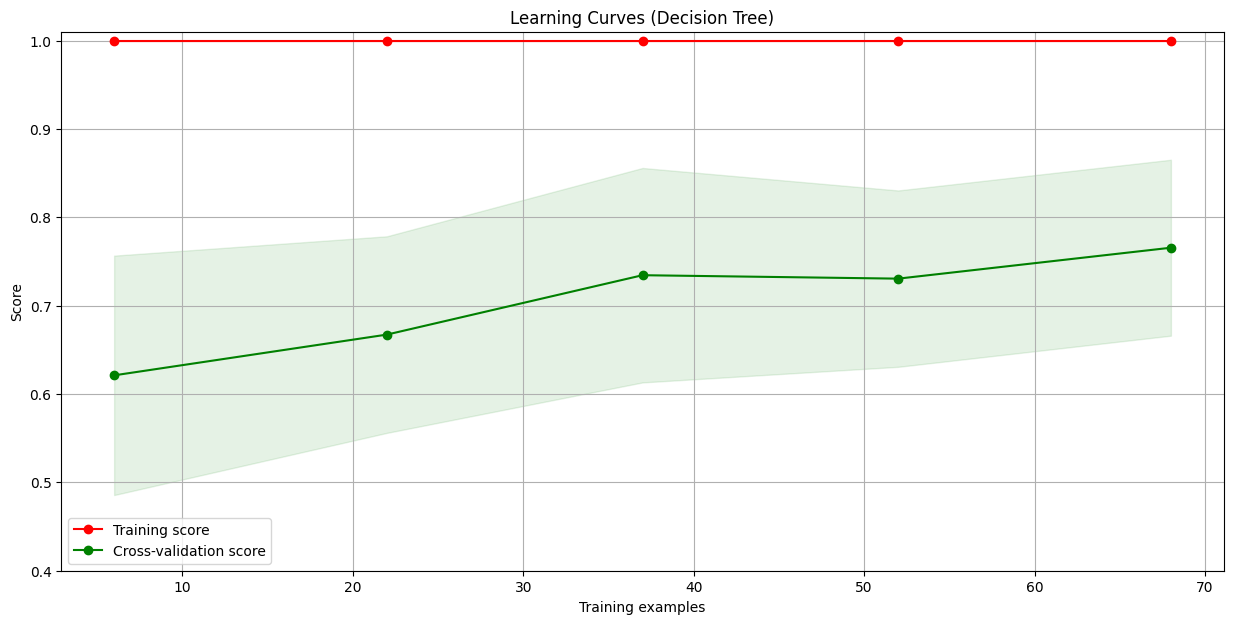

(0.8329973959014494, 0.33400520819710133)

In [70]:
title = "Learning Curves (Decision Tree)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = DecisionTreeClassifier()
plot_learning_curve(estimator, title, X_train, y_train, ylim=(0.4, 1.01), cv=cv, n_jobs=4)

### Random Forest

In [71]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
x_train=sc.fit_transform(X_train)
x_test=sc.transform(X_test)
y_train.shape,y_test.shape

((86,), (15,))

In [72]:
from sklearn.ensemble import RandomForestClassifier
rfr = RandomForestClassifier(max_depth=3,random_state=0)
rfr.fit(x_train, y_train)
y_pred=rfr.predict(x_test)
print("Accuracy of train:",rfr.score(X_train,y_train))
print('Accuracy of test: ',rfr.score(x_test, y_test))

Accuracy of train: 0.9186046511627907
Accuracy of test:  0.7333333333333333


In [73]:
gsearch1_preds = rfr.predict(X_test)
print(classification_report(y_test,gsearch1_preds))

              precision    recall  f1-score   support

           0       0.33      0.33      0.33         3
           1       0.83      0.83      0.83        12

    accuracy                           0.73        15
   macro avg       0.58      0.58      0.58        15
weighted avg       0.73      0.73      0.73        15



In [74]:
print(confusion_matrix(y_test, gsearch1_preds))

[[ 1  2]
 [ 2 10]]


<Figure size 1500x700 with 0 Axes>

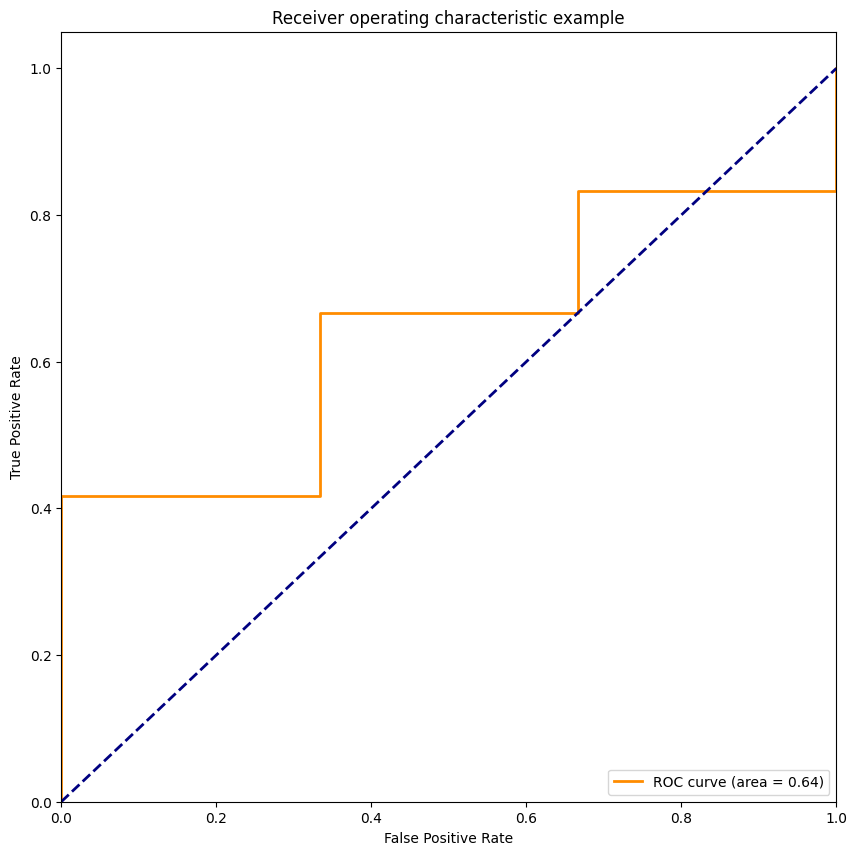

In [75]:
y_score = rfr.predict_proba(X_test)
fpr,tpr,threshold = roc_curve(y_test, y_score[:,1])
roc_auc = auc(fpr,tpr)
 
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

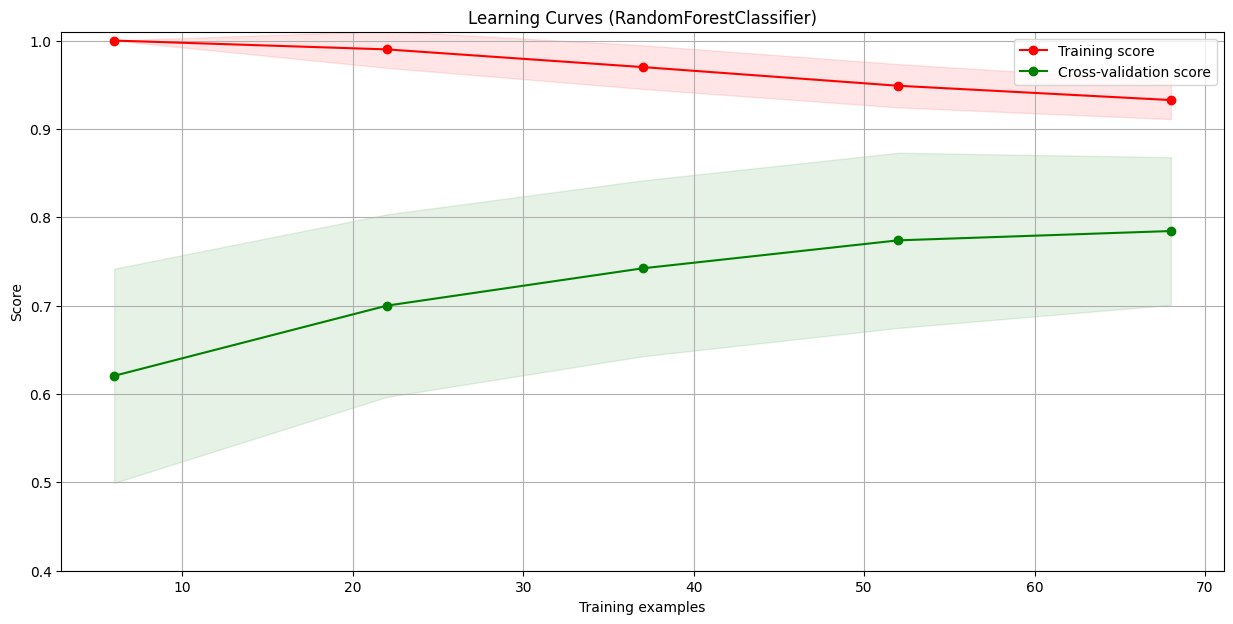

(0.8275003593044445, 0.25335527613979436)

In [76]:
title = "Learning Curves (RandomForestClassifier)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = RandomForestClassifier(max_depth=3,random_state=0)
plot_learning_curve(estimator, title, X_train, y_train, ylim=(0.4, 1.01), cv=cv, n_jobs=4)

In [77]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [78]:
param_test1 = {'n_estimators':range(10,101,10)}
gsearch1 = GridSearchCV(estimator = RandomForestClassifier(max_depth=18,max_features='sqrt' ,random_state=0), 
                       param_grid = param_test1,cv=5)
gsearch1.fit(x_train, y_train)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([0.03151584, 0.04248662, 0.06741719, 0.11908178, 0.13244567,
         0.1404264 , 0.17972136, 0.24713836, 0.22220531, 0.23576937]),
  'std_fit_time': array([0.00537483, 0.00660305, 0.00537072, 0.02723777, 0.02942777,
         0.01802337, 0.0208859 , 0.03417646, 0.04116539, 0.0513539 ]),
  'mean_score_time': array([0.00418944, 0.0051856 , 0.00578442, 0.01017284, 0.010571  ,
         0.01216617, 0.014958  , 0.01875   , 0.01615734, 0.01675487]),
  'std_score_time': array([0.00097734, 0.00116336, 0.00116367, 0.00159609, 0.00079721,
         0.00277964, 0.00333712, 0.00171546, 0.00434299, 0.00347789]),
  'param_n_estimators': masked_array(data=[10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
               mask=[False, False, False, False, False, False, False, False,
                     False, False],
         fill_value='?',
              dtype=object),
  'params': [{'n_estimators': 10},
   {'n_estimators': 20},
   {'n_estimators': 30},
   {'n_estimators': 40},
   {'n_e

In [79]:
param_test2 = {'max_depth':range(1,20,1)}
gsearch2 = GridSearchCV(estimator = RandomForestClassifier(n_estimators = 20),
   param_grid = param_test2,cv=5)
gsearch2.fit(x_train, y_train)
gsearch2.cv_results_, gsearch2.best_params_, gsearch2.best_score_

({'mean_fit_time': array([0.05245976, 0.04308543, 0.0458775 , 0.0454782 , 0.05944161,
         0.04627409, 0.04507918, 0.05245924, 0.04109097, 0.04667535,
         0.04767327, 0.05126305, 0.03809791, 0.05704794, 0.04228601,
         0.04288316, 0.05126114, 0.03969388, 0.03650265]),
  'std_fit_time': array([0.00882055, 0.00277766, 0.00373206, 0.00439757, 0.00891042,
         0.00814078, 0.00443306, 0.0051463 , 0.00284823, 0.00460835,
         0.01113156, 0.00740103, 0.00465169, 0.00579514, 0.00507172,
         0.00560722, 0.0045747 , 0.00410719, 0.00566263]),
  'mean_score_time': array([0.00498619, 0.00478683, 0.00518579, 0.00419002, 0.00578375,
         0.00458927, 0.00538616, 0.00578475, 0.00438852, 0.0045876 ,
         0.00438776, 0.004388  , 0.00458822, 0.00518708, 0.00498805,
         0.0045887 , 0.00538669, 0.00438814, 0.00339084]),
  'std_score_time': array([0.00063196, 0.00074606, 0.00074503, 0.00097844, 0.00097805,
         0.00079743, 0.00119673, 0.00203462, 0.00101873, 0.0010

In [80]:
from sklearn.metrics import classification_report
rfr = RandomForestClassifier(max_depth=5,random_state=0,n_estimators=20)
rfr.fit(x_train, y_train)
y_pred=rfr.predict(x_test)
print('Accuracy of train:',rfr.score(x_train, y_train))
print('Accuracy of test:',rfr.score(x_test, y_test))

Accuracy of train: 1.0
Accuracy of test: 0.7333333333333333


In [81]:
gsearch1_preds = rfr.predict(X_test)
print(classification_report(y_test,gsearch1_preds))

              precision    recall  f1-score   support

           0       0.33      0.33      0.33         3
           1       0.83      0.83      0.83        12

    accuracy                           0.73        15
   macro avg       0.58      0.58      0.58        15
weighted avg       0.73      0.73      0.73        15



In [82]:
print(confusion_matrix(y_test, gsearch1_preds))

[[ 1  2]
 [ 2 10]]


<Figure size 1500x700 with 0 Axes>

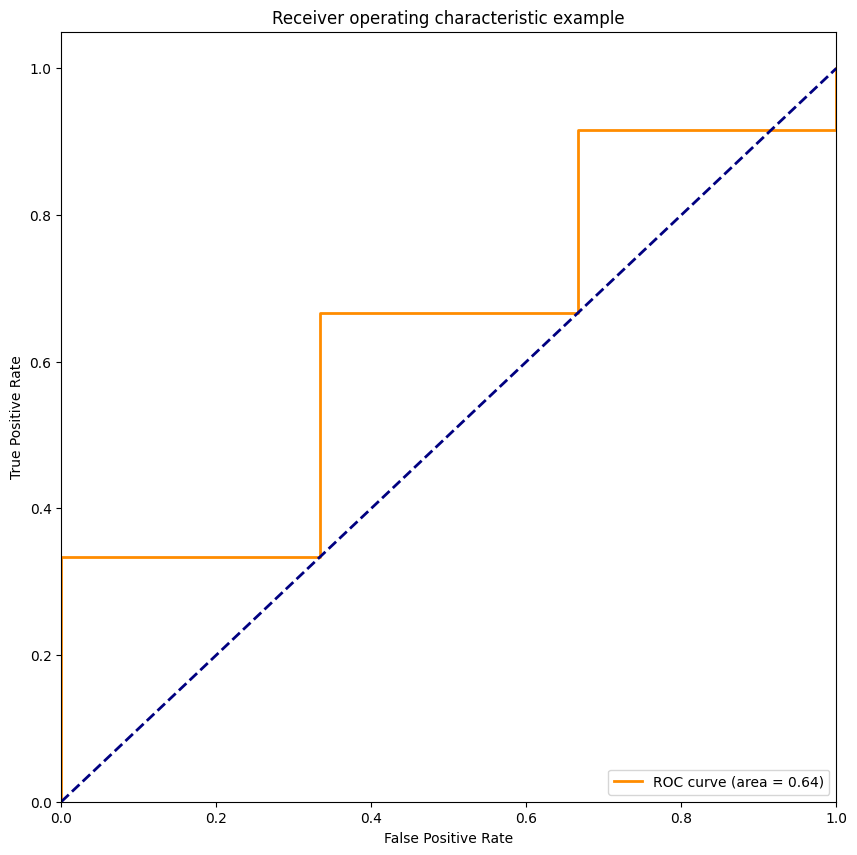

In [83]:
y_score = rfr.predict_proba(X_test)
fpr,tpr,threshold = roc_curve(y_test, y_score[:,1])
roc_auc = auc(fpr,tpr)
 
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

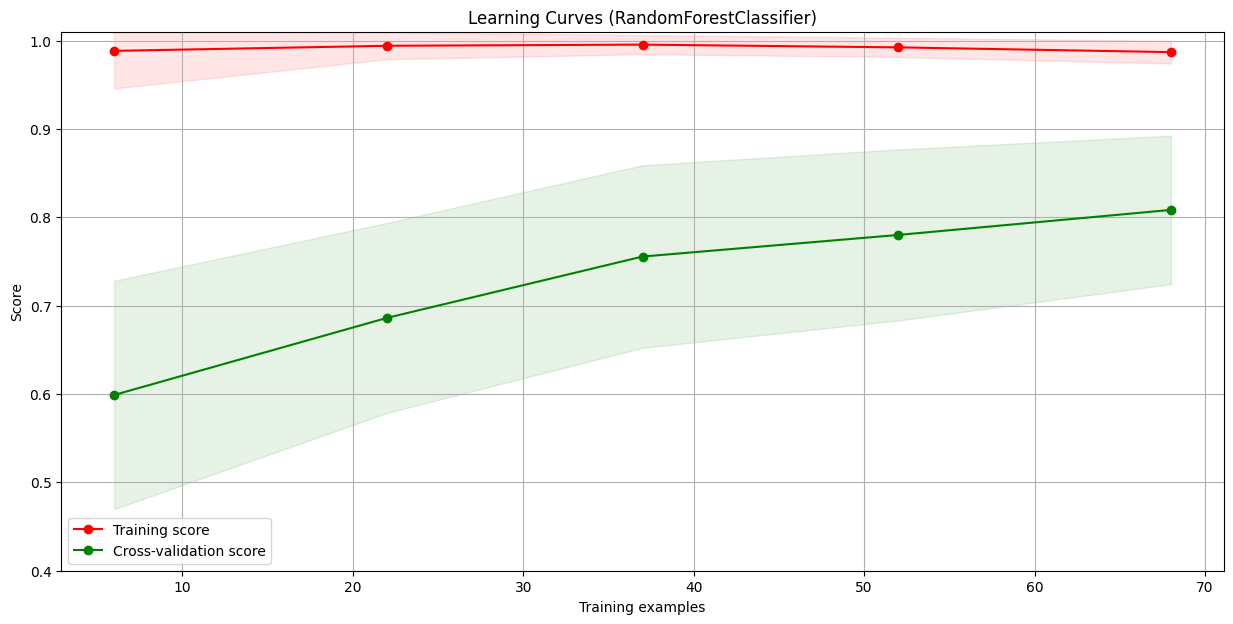

(0.8620113782147348, 0.2754059060100724)

In [84]:
title = "Learning Curves (RandomForestClassifier)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = RandomForestClassifier(max_depth=5,random_state=0,n_estimators=20)
plot_learning_curve(estimator, title, X_train, y_train, ylim=(0.4, 1.01), cv=cv, n_jobs=4)

### Neural Network

In [85]:
from sklearn.neural_network import MLPClassifier
# initialize model
clf = MLPClassifier(hidden_layer_sizes=(5,4), activation='relu', max_iter=500, random_state=0)
print(clf)
# training
clf.fit(x_train,y_train)
# testing
print("Accuracy of train:",clf.score(X_train,y_train))
print("Accuracy of test:",clf.score(x_test,y_test))

MLPClassifier(hidden_layer_sizes=(5, 4), max_iter=500, random_state=0)
Accuracy of train: 0.7441860465116279
Accuracy of test: 0.8666666666666667


c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [86]:
# initialize model
clf = MLPClassifier(hidden_layer_sizes=(10,4), activation='relu', max_iter=500, random_state=0)
# training
clf.fit(x_train,y_train)
# testing
print("Accuracy of train:",clf.score(X_train,y_train))
print("Accuracy of test:",clf.score(x_test,y_test))

Accuracy of train: 0.7558139534883721
Accuracy of test: 0.7333333333333333


c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [87]:
# initialize model
clf = MLPClassifier(hidden_layer_sizes=(20,4), activation='relu', max_iter=500, random_state=0)
# training
clf.fit(x_train,y_train)
# testing
print("Accuracy of train:",clf.score(X_train,y_train))
print("Accuracy of test:",clf.score(x_test,y_test))

Accuracy of train: 0.8255813953488372
Accuracy of test: 0.8


c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [88]:
# initialize model
clf = MLPClassifier(hidden_layer_sizes=(30,4), activation='relu', max_iter=500, random_state=0)
# training
clf.fit(x_train,y_train)
# testing
print("Accuracy of train:",clf.score(X_train,y_train))
print("Accuracy of test:",clf.score(x_test,y_test))

Accuracy of train: 0.8953488372093024
Accuracy of test: 0.8


c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [89]:
%timeit 
mlp_tuned_parameters = {"hidden_layer_sizes": [(20,4),(22, 4),(24,4),(26,4),(28,4),(30,4)],
                        'activation': ['identity', 'logistic', 'tanh', 'relu'],
                        "solver": ['adam', 'sgd', 'lbfgs'],
                       'learning_rate': ['constant','adaptive']}
mlp = MLPClassifier(max_iter=500)
estimator = GridSearchCV(mlp, mlp_tuned_parameters, n_jobs=5)
estimator.fit(X_train, y_train)

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


GridSearchCV(estimator=MLPClassifier(max_iter=500), n_jobs=5,
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'hidden_layer_sizes': [(20, 4), (22, 4), (24, 4),
                                                (26, 4), (28, 4), (30, 4)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['adam', 'sgd', 'lbfgs']})

In [90]:
print(estimator.best_params_)

{'activation': 'tanh', 'hidden_layer_sizes': (28, 4), 'learning_rate': 'adaptive', 'solver': 'lbfgs'}


In [91]:
mlp = MLPClassifier(hidden_layer_sizes=(28,4), max_iter=500,learning_rate='adaptive',solver='lbfgs',activation='tanh')
mlp.fit(X_train, y_train)
print("Accuracy of train:",mlp.score(X_train,y_train))
print("Accuracy of test:",mlp.score(x_test,y_test))

Accuracy of train: 0.9767441860465116
Accuracy of test: 0.6666666666666666


c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [92]:
predictions = mlp.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.77      0.83      0.80        12

    accuracy                           0.67        15
   macro avg       0.38      0.42      0.40        15
weighted avg       0.62      0.67      0.64        15



In [93]:
print(confusion_matrix(y_test, predictions))

[[ 0  3]
 [ 2 10]]


<Figure size 1500x700 with 0 Axes>

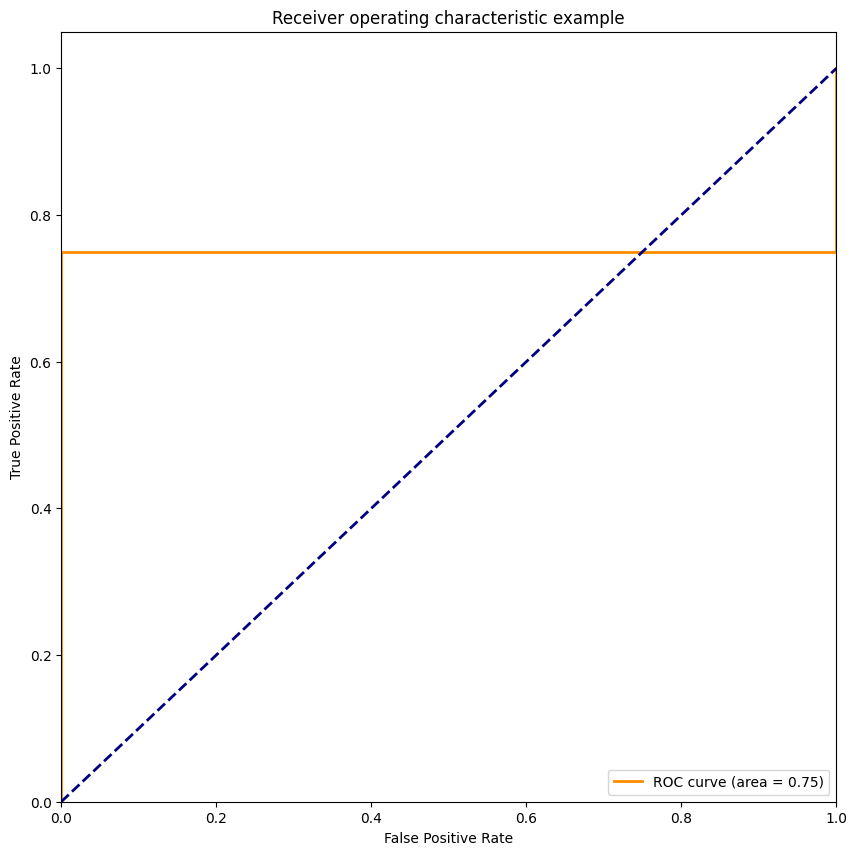

In [94]:
y_score = mlp.predict_proba(X_test)
fpr,tpr,threshold = roc_curve(y_test, y_score[:,1])
roc_auc = auc(fpr,tpr)
 
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

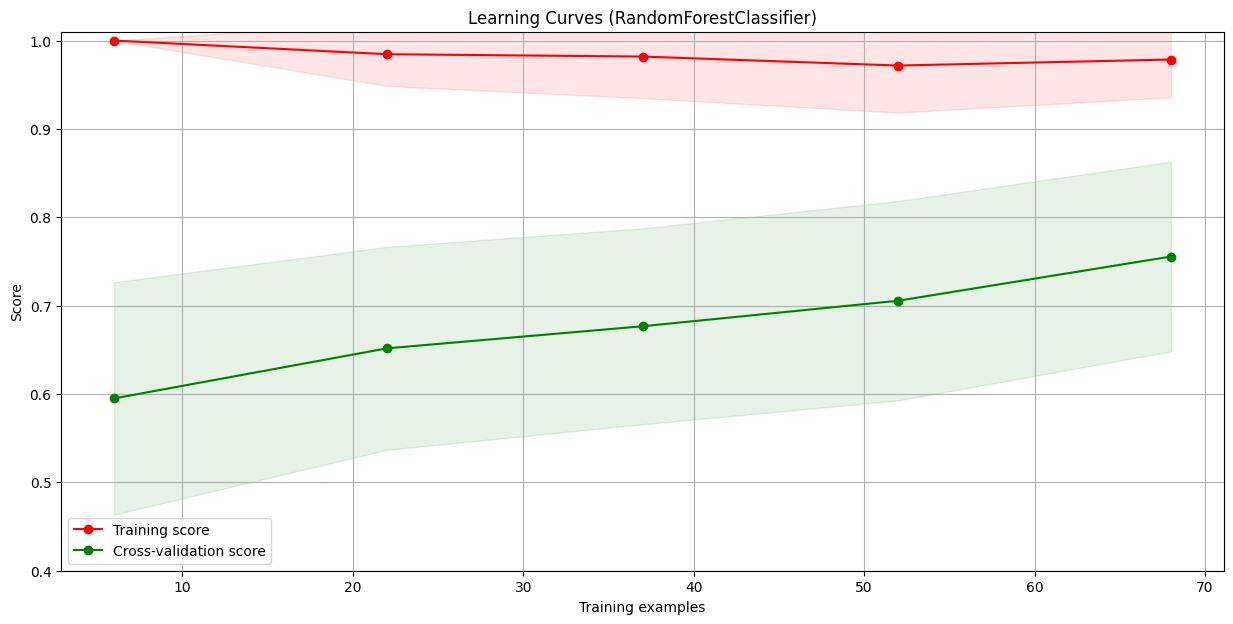

(0.834720255926185, 0.3732080630280771)

In [95]:
title = "Learning Curves (RandomForestClassifier)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = MLPClassifier(hidden_layer_sizes=(28,4), max_iter=500,learning_rate='adaptive',solver='lbfgs',activation='tanh')
plot_learning_curve(estimator, title, X_train, y_train, ylim=(0.4, 1.01), cv=cv, n_jobs=4)